In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Linux/cleaned_asv_df.csv")
newstuff = pd.read_excel("SG_90_only_new.xlsx")

In [3]:
dates = pd.read_csv("Models_and_data/Data_prep/collection_dates.csv")
dates = dates.drop(columns="Unnamed: 0")
full_data = pd.read_csv("ML_Data/FINAL_GENUS_TAXA_CLR.csv")
microbiome = full_data.iloc[:,1:-13]

In [4]:
import pandas as pd

# Assuming 'newstuff' and 'df' are already defined pandas DataFrames

# Define the columns to retain from 'newstuff'
columns_to_retain = [
    'phy_perf_sppbs_total_score_consolidated',
    'cog_mmse_totalscore',
    'func_stat_badl_total',
    'func_stat_iadl_score'
]

# Define the columns to check for matching Sample_ID
columns_to_check = ['subno', 'f4_no', 'subno_schs', 'alt_ID']

# Create a set of Sample_IDs for faster lookup
sample_ids_set = set(df['Sample_ID'])

# Step 1: Select the desired columns from 'newstuff'
metadata_new = newstuff[columns_to_retain].copy()

# Step 2: Create a boolean mask where any of the specified columns match 'Sample_ID'
mask = newstuff[columns_to_check].isin(sample_ids_set).any(axis=1)

# Apply the mask to filter the rows
metadata_new = metadata_new[mask].copy()

# Step 3: Add 'Sample_ID' to 'metadata_new'
# Define a function to find the matching Sample_ID for each row
def find_matching_sample_id(row):
    for col in columns_to_check:
        if row[col] in sample_ids_set:
            return row[col]
    return None  # In case there's no match, though mask should ensure at least one match

# Apply the function to each row to create the 'Sample_ID' column
metadata_new['Sample_ID'] = newstuff.loc[mask].apply(find_matching_sample_id, axis=1).astype(int)

# (Optional) Reset the index of the new DataFrame
metadata_new.reset_index(drop=True, inplace=True)

#get rid of duplicates
metadata_new = metadata_new.drop([225, 226])

metadata_new = metadata_new.set_index('Sample_ID').loc[df['Sample_ID']].reset_index()

# Display the first few rows of the new metadata DataFrame
metadata_new


,Sample_ID,phy_perf_sppbs_total_score_consolidated,cog_mmse_totalscore,func_stat_badl_total,func_stat_iadl_score
0,80004,5.0,20.0,20,14.0
1,80001,3.0,22.0,9999,15.0
2,80020,4.0,19.0,19,1.0
3,80007,5.0,21.0,20,14.0
4,80019,0.0,13.0,4,5.0
...,...,...,...,...,...
306,43327,9.0,29.0,20,16.0
307,47170,10.0,27.0,20,15.0
308,5703,10.0,25.0,20,16.0
309,14654,9.0,29.0,20,16.0


In [5]:
outer_df = full_data.drop(full_data.columns[1:-13], axis=1)



In [6]:
outer_df

,Sample_ID,Age,Epigenetic_deviation,BMI,Group,Race_1.0,Race_2.0,Race_3.0,Race_4.0,Sex_1.0,Sex_2.0,Smoking_0.0,Smoking_1.0,Smoking_2.0
0,80004,87.961644,1.582379,17.545506,Worse,1,0,0,0,0,1,1,0,0
1,80001,87.561644,-17.008019,23.871528,Better,1,0,0,0,0,1,1,0,0
2,80020,89.000000,-7.461716,25.778835,Worse,1,0,0,0,0,1,0,1,0
3,80007,86.460274,-12.790208,27.038133,Better,1,0,0,0,1,0,1,0,0
4,80019,89.013699,-7.160825,23.262468,Worse,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,43327,86.816438,-6.386774,29.299593,Worse,1,0,0,0,0,1,1,0,0
307,47170,86.923288,-6.246294,20.115458,Worse,1,0,0,0,1,0,0,0,1
308,5703,89.712329,-12.695643,19.223376,Better,1,0,0,0,0,1,1,0,0
309,14654,89.295890,-12.169833,29.927159,Better,1,0,0,0,1,0,0,0,1


In [7]:
new = pd.merge(metadata_new, outer_df, on='Sample_ID', how='left')


In [8]:
new = pd.merge(new, dates, on="Sample_ID", how="left")

In [9]:
new

,Sample_ID,phy_perf_sppbs_total_score_consolidated,cog_mmse_totalscore,func_stat_badl_total,func_stat_iadl_score,Age,Epigenetic_deviation,BMI,Group,Race_1.0,...,Sex_2.0,Smoking_0.0,Smoking_1.0,Smoking_2.0,others_v1_date,others_v2_date,others_v3_date,others_v4_date,others_v5_date,others_Saliva_collection_date
0,80004,5.0,20.0,20,14.0,87.961644,1.582379,17.545506,Worse,1,...,1,1,0,0,2018-02-28 00:00:00,2018-02-28 00:00:00,2018-03-21 00:00:00,2018-03-21 00:00:00,2019-03-14 00:00:00,2021-01-14 00:00:00
1,80001,3.0,22.0,9999,15.0,87.561644,-17.008019,23.871528,Better,1,...,1,1,0,0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,2015-11-30 00:00:00
2,80020,4.0,19.0,19,1.0,89.000000,-7.461716,25.778835,Worse,1,...,1,0,1,0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,2015-12-10 00:00:00
3,80007,5.0,21.0,20,14.0,86.460274,-12.790208,27.038133,Better,1,...,0,1,0,0,2017-10-20 00:00:00,2017-10-20 00:00:00,2017-10-23 00:00:00,2017-10-23 00:00:00,2018-03-16 00:00:00,2018-09-20 00:00:00
4,80019,0.0,13.0,4,5.0,89.013699,-7.160825,23.262468,Worse,1,...,1,1,0,0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,2015-12-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,43327,9.0,29.0,20,16.0,86.816438,-6.386774,29.299593,Worse,1,...,1,1,0,0,2018-03-15 00:00:00,2018-03-15 00:00:00,2018-03-19 00:00:00,2018-03-19 00:00:00,2018-11-21 00:00:00,2019-10-02 00:00:00
307,47170,10.0,27.0,20,15.0,86.923288,-6.246294,20.115458,Worse,1,...,0,0,0,1,2018-01-25 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-26 00:00:00,2018-11-02 00:00:00,2019-10-02 00:00:00
308,5703,10.0,25.0,20,16.0,89.712329,-12.695643,19.223376,Better,1,...,1,1,0,0,2018-03-08 00:00:00,2018-03-08 00:00:00,2018-03-23 00:00:00,2018-03-23 00:00:00,2018-09-24 00:00:00,2019-10-08 00:00:00
309,14654,9.0,29.0,20,16.0,89.295890,-12.169833,29.927159,Better,1,...,0,0,0,1,2018-03-22 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-23 00:00:00,2018-09-18 00:00:00,2019-10-09 00:00:00


In [10]:
#new.to_csv("additional_metadata.csv", index=False)

In [11]:
missing_counts = new.apply(lambda col: col.isna().sum() + (col == '#NULL!').sum())
print(missing_counts)


Sample_ID                                   0
phy_perf_sppbs_total_score_consolidated     1
cog_mmse_totalscore                         4
func_stat_badl_total                        0
func_stat_iadl_score                        1
Age                                         0
Epigenetic_deviation                        0
BMI                                         0
Group                                       0
Race_1.0                                    0
Race_2.0                                    0
Race_3.0                                    0
Race_4.0                                    0
Sex_1.0                                     0
Sex_2.0                                     0
Smoking_0.0                                 0
Smoking_1.0                                 0
Smoking_2.0                                 0
others_v1_date                             87
others_v2_date                             87
others_v3_date                             87
others_v4_date                    

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_38828\1496963016.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new[missing_cols] = new[missing_cols].applymap(lambda x: np.nan if x > 2000 else x)


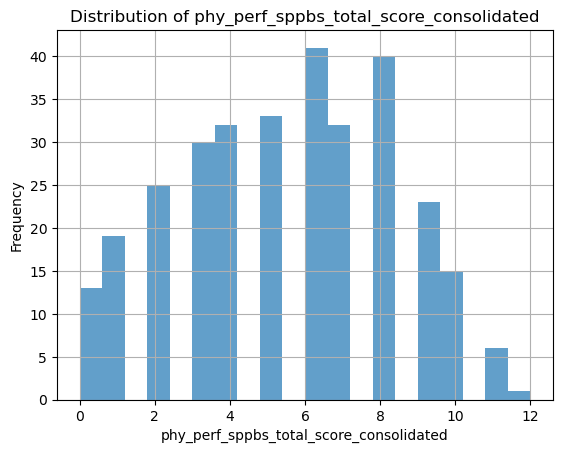

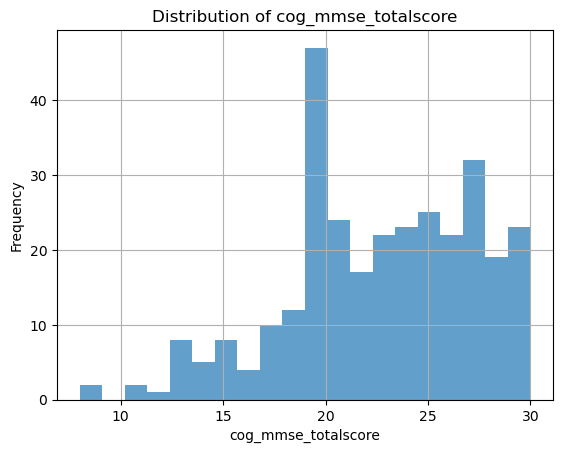

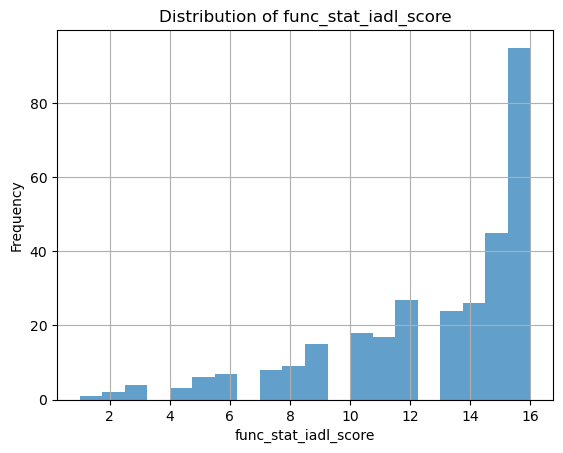

Sample_ID                                   0
phy_perf_sppbs_total_score_consolidated     1
cog_mmse_totalscore                         5
func_stat_badl_total                        0
func_stat_iadl_score                        4
Age                                         0
Epigenetic_deviation                        0
BMI                                         0
Group                                       0
Race_1.0                                    0
Race_2.0                                    0
Race_3.0                                    0
Race_4.0                                    0
Sex_1.0                                     0
Sex_2.0                                     0
Smoking_0.0                                 0
Smoking_1.0                                 0
Smoking_2.0                                 0
others_v1_date                             87
others_v2_date                             87
others_v3_date                             87
others_v4_date                    

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Identify columns with missing values
missing_cols = new.columns[new.isnull().any()]

# Replace values > 2000 with NaN in columns with missing values
new[missing_cols] = new[missing_cols].applymap(lambda x: np.nan if x > 2000 else x)

# Plot distributions for columns with missing values
for col in missing_cols:
    plt.figure()
    new[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

missing_counts = new.apply(lambda col: col.isna().sum() + (col == '#NULL!').sum())
print(missing_counts)



phy_perf_sppbs_total_score_consolidated    0
cog_mmse_totalscore                        0
func_stat_iadl_score                       0
dtype: int64


C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_38828\617998413.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new[col].fillna(new[col].median(), inplace=True)


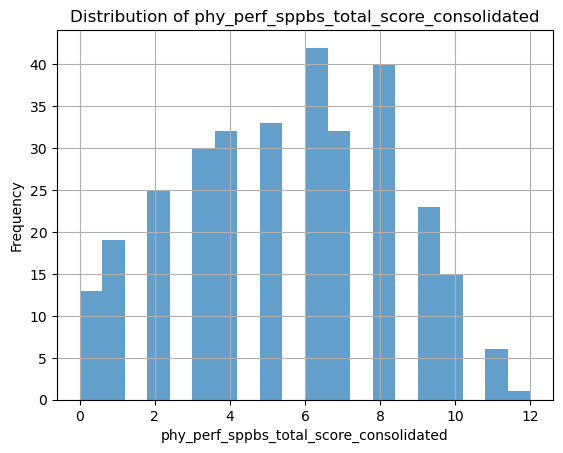

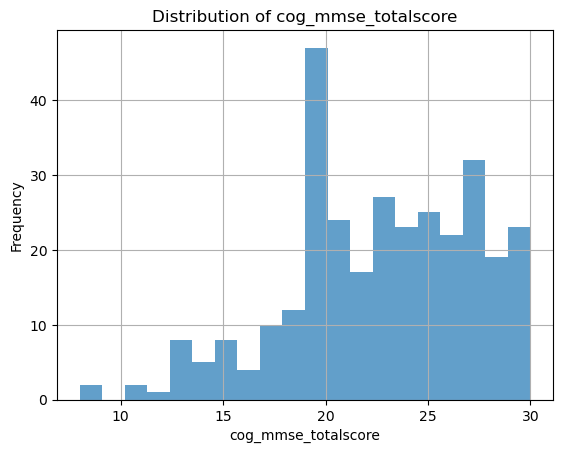

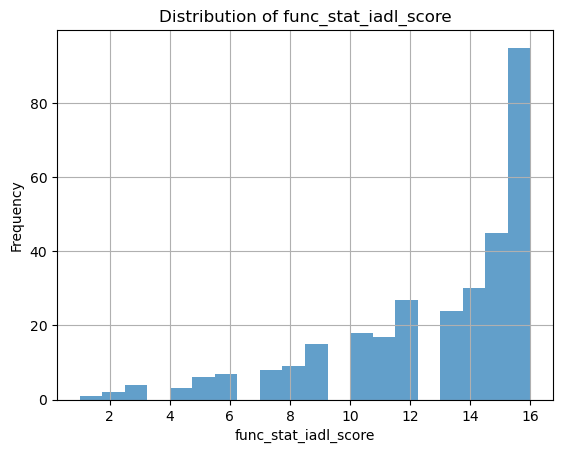

In [13]:
# cols to impute values
cols_to_impute = ['phy_perf_sppbs_total_score_consolidated', 
                  'cog_mmse_totalscore', 
                  'func_stat_iadl_score']

# Perform median imputation
for col in cols_to_impute:
    new[col].fillna(new[col].median(), inplace=True)

# Verify missing values are handled
print(new[cols_to_impute].isnull().sum())

for col in cols_to_impute:
    plt.figure()
    new[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [86]:
#v1 used for mmse, iadl, badl, age, sex, race
#v4 used for smoking
#v5 used for SPPB, BMI

# age, sex, race, smoking, BMI are confounders for microbiome to epigenetics analyses
# mmse, iadl, badl, SPPB are outcome variables in its own right with microbiome as independent variable

In [ ]:
df = new

# Replace '#NULL!' with NaN
df.replace('#NULL!', np.nan, inplace=True)

# Convert date columns to datetime
df['others_v1_date'] = pd.to_datetime(df['others_v1_date'], errors='coerce')
df['others_Saliva_collection_date'] = pd.to_datetime(df['others_Saliva_collection_date'], errors='coerce')
df['others_v4_date'] = pd.to_datetime(df['others_v4_date'], errors='coerce')
df['others_v5_date'] = pd.to_datetime(df['others_v5_date'], errors='coerce')

# Calculate time differences and handle NaN values
df['time_diff_v1_bio'] = df.apply(
    lambda row: np.abs((row['others_v1_date'] - row['others_Saliva_collection_date']).days) 
    if pd.notna(row['others_v1_date']) and pd.notna(row['others_Saliva_collection_date']) else np.nan, 
    axis=1
)

df['time_diff_v4_bio'] = df.apply(
    lambda row: np.abs((row['others_v4_date'] - row['others_Saliva_collection_date']).days) 
    if pd.notna(row['others_v4_date']) and pd.notna(row['others_Saliva_collection_date']) else np.nan, 
    axis=1
)

df['time_diff_v5_bio'] = df.apply(
    lambda row: np.abs((row['others_v5_date'] - row['others_Saliva_collection_date']).days) 
    if pd.notna(row['others_v5_date']) and pd.notna(row['others_Saliva_collection_date']) else np.nan, 
    axis=1
)

df

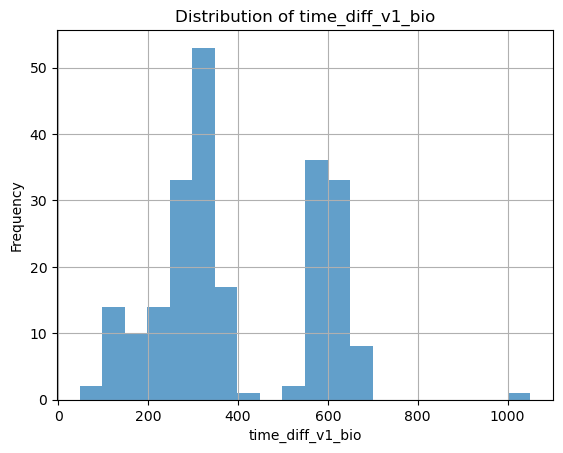

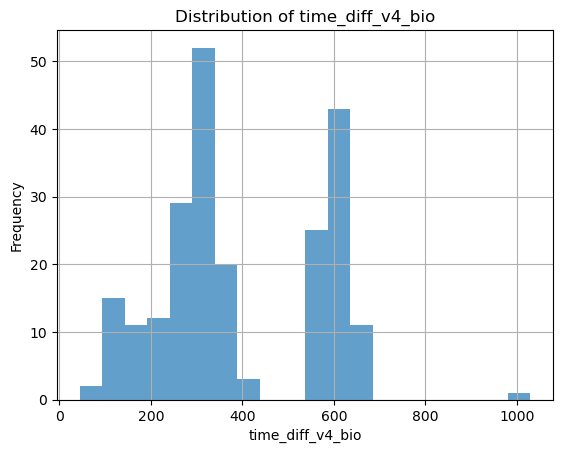

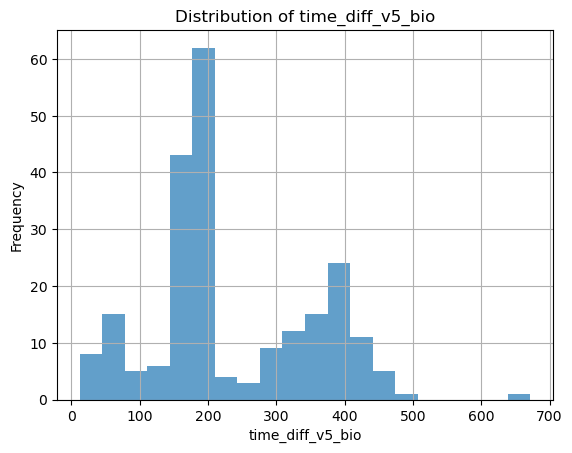

In [15]:
for col in ['time_diff_v1_bio',	'time_diff_v4_bio',	'time_diff_v5_bio']:
    plt.figure()
    new[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
microbiome = full_data.iloc[:,1:-13]

In [17]:
from sklearn.decomposition import PCA

# We'll do PCA to reduce from n_taxa to, say, 10 PCs
n_components = 10
pca_model = PCA(n_components=n_components)
microbiome_pcs = pca_model.fit_transform(microbiome.values)  # returns np array of shape (n_samples, 10)

# Turn into DataFrame for convenience
microbiome_pcs_df = pd.DataFrame(
    microbiome_pcs,
    index=microbiome.index,  # same sample IDs
    columns=[f"PC{i+1}" for i in range(n_components)]
)

microbiome_pcs_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.203466,-16.295220,-18.528085,-5.001939,-7.541971,-4.952890,-1.722548,1.983470,12.542803,-4.018620
1,5.568091,10.671485,3.806584,-11.747295,7.361438,-8.255543,-6.674546,0.506325,13.387136,12.802839
2,-2.148263,26.810513,-7.979550,-18.960326,9.345946,-3.903217,4.578052,9.530275,-1.283978,19.549885
3,-35.290148,-13.205156,1.216500,11.117393,-13.341104,-2.312885,-4.226858,-3.364878,-6.097222,-2.668841
4,-35.442744,-9.110559,4.008562,-6.517072,-0.219285,-2.432268,-2.148862,2.690490,2.982315,-11.314875
...,...,...,...,...,...,...,...,...,...,...
306,-49.951981,-9.750132,14.678563,8.746037,-19.402550,3.091409,-0.716785,8.399240,2.886015,-7.670001
307,-6.706629,-20.133057,-16.004814,20.721256,-19.623662,-3.312096,0.707182,-9.973778,2.634551,-5.305280
308,7.478076,-15.861588,-0.807266,-1.448094,-3.829640,-15.099602,5.115817,3.682431,7.041987,2.648282
309,-39.806841,-10.174859,3.367894,-6.126170,-13.035719,0.196818,-1.408014,8.161092,0.971262,-5.240942


In [18]:
analysis_df = df.join(microbiome_pcs_df, how='inner')
analysis_df

,Sample_ID,phy_perf_sppbs_total_score_consolidated,cog_mmse_totalscore,func_stat_badl_total,func_stat_iadl_score,Age,Epigenetic_deviation,BMI,Group,Race_1.0,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,80004,5.0,20.0,20,14.0,87.961644,1.582379,17.545506,Worse,1,...,-8.203466,-16.295220,-18.528085,-5.001939,-7.541971,-4.952890,-1.722548,1.983470,12.542803,-4.018620
1,80001,3.0,22.0,9999,15.0,87.561644,-17.008019,23.871528,Better,1,...,5.568091,10.671485,3.806584,-11.747295,7.361438,-8.255543,-6.674546,0.506325,13.387136,12.802839
2,80020,4.0,19.0,19,1.0,89.000000,-7.461716,25.778835,Worse,1,...,-2.148263,26.810513,-7.979550,-18.960326,9.345946,-3.903217,4.578052,9.530275,-1.283978,19.549885
3,80007,5.0,21.0,20,14.0,86.460274,-12.790208,27.038133,Better,1,...,-35.290148,-13.205156,1.216500,11.117393,-13.341104,-2.312885,-4.226858,-3.364878,-6.097222,-2.668841
4,80019,0.0,13.0,4,5.0,89.013699,-7.160825,23.262468,Worse,1,...,-35.442744,-9.110559,4.008562,-6.517072,-0.219285,-2.432268,-2.148862,2.690490,2.982315,-11.314875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,43327,9.0,29.0,20,16.0,86.816438,-6.386774,29.299593,Worse,1,...,-49.951981,-9.750132,14.678563,8.746037,-19.402550,3.091409,-0.716785,8.399240,2.886015,-7.670001
307,47170,10.0,27.0,20,15.0,86.923288,-6.246294,20.115458,Worse,1,...,-6.706629,-20.133057,-16.004814,20.721256,-19.623662,-3.312096,0.707182,-9.973778,2.634551,-5.305280
308,5703,10.0,25.0,20,16.0,89.712329,-12.695643,19.223376,Better,1,...,7.478076,-15.861588,-0.807266,-1.448094,-3.829640,-15.099602,5.115817,3.682431,7.041987,2.648282
309,14654,9.0,29.0,20,16.0,89.295890,-12.169833,29.927159,Better,1,...,-39.806841,-10.174859,3.367894,-6.126170,-13.035719,0.196818,-1.408014,8.161092,0.971262,-5.240942


In [19]:
analysis_df.rename(columns={
    "Sex_1.0" : "Sex_1_0",
    "Race_1.0": "Race_1_0",
    "Race_2.0": "Race_2_0",
    "Race_3.0": "Race_3_0",
    "Smoking_0.0": "Smoking_0_0",
    "Smoking_1.0": "Smoking_1_0",
}, inplace=True)


In [25]:
metadata = analysis_df
metadata = metadata.drop(columns=['others_v1_date', 'others_v2_date',
       'others_v3_date', 'others_v4_date', 'others_v5_date',
       'others_Saliva_collection_date','PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
       'PC8', 'PC9', 'PC10'])
metadata.to_csv("Metadata.csv", index=False)

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def final_merged_analysis(analysis_df):
    """
    1) Two baseline models:
       - baseline_all_samples: fit on all data that has confounders+PCs+outcome
       - baseline_has_time: fit on data that has at least one time diff (v4 or v5)
    2) Main & interaction for v5 (BMI) and v4 (Smoking).
    3) ANOVA: baseline_has_time vs. main vs. interaction (three models) on
       the intersection of rows, for each v4 & v5. 
    4) Save the ANOVA tables FIRST, then model summaries, to 'merged_results.xlsx'.
    """

    ###########################################################################
    # (A) Confounders + Predictors
    ###########################################################################
    confounders = ["Age", "BMI"]  # or your chosen confounders
    extra_dummies = ["Sex_1_0", "Race_1_0", "Race_2_0", "Race_3_0",
                     "Smoking_0_0", "Smoking_1_0"]
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    baseline_predictors = confounders + extra_dummies + pc_cols
    
    baseline_formula = "Epigenetic_deviation ~ " + " + ".join(baseline_predictors)

    # Prepare a dictionary of DataFrames to be written to Excel
    # We’ll add the ANOVA sheets first, then the model summaries
    dfs_for_excel = {}

    ###########################################################################
    # (B) Two baseline models
    ###########################################################################
    # 1) Baseline (all-samples)
    subset_all = analysis_df.dropna(subset=baseline_predictors)
    if len(subset_all) < 5:
        baseline_all_model = None
        dfs_for_excel["baseline_all_samples"] = pd.DataFrame(
            {"Info": ["Not enough samples for baseline_all_samples"]}
        )
    else:
        baseline_all_model = smf.ols(baseline_formula, data=subset_all).fit()
        dfs_for_excel["baseline_all_samples"] = baseline_all_model.summary2().tables[1]

    # 2) Baseline (has-time)
    subset_has_time = analysis_df[
        (analysis_df["time_diff_v4_bio"].notna()) | (analysis_df["time_diff_v5_bio"].notna())
    ].dropna(subset=baseline_predictors)

    if len(subset_has_time) < 5:
        baseline_has_time_model = None
        dfs_for_excel["baseline_has_time"] = pd.DataFrame(
            {"Info": ["Not enough samples for baseline_has_time"]}
        )
    else:
        baseline_has_time_model = smf.ols(baseline_formula, data=subset_has_time).fit()
        dfs_for_excel["baseline_has_time"] = baseline_has_time_model.summary2().tables[1]

    ###########################################################################
    # (C) MAIN + INTERACTION FOR V5 (BMI)
    ###########################################################################
    subset_known_v5 = analysis_df.dropna(
        subset=["time_diff_v5_bio", "BMI"] + baseline_predictors
    )
    main_formula_v5 = (
        "Epigenetic_deviation ~ time_diff_v5_bio + BMI + " 
        + " + ".join(baseline_predictors)
    )
    int_formula_v5 = (
        "Epigenetic_deviation ~ time_diff_v5_bio*BMI + "
        + " + ".join(baseline_predictors)
    )

    if len(subset_known_v5) < 5:
        model_main_v5 = None
        model_int_v5 = None
        dfs_for_excel["main_v5"] = pd.DataFrame({"Info": ["Not enough data for main_v5"]})
        dfs_for_excel["int_v5"] = pd.DataFrame({"Info": ["Not enough data for int_v5"]})
    else:
        model_main_v5 = smf.ols(main_formula_v5, data=subset_known_v5).fit()
        model_int_v5 = smf.ols(int_formula_v5, data=subset_known_v5).fit()

        dfs_for_excel["main_v5"] = model_main_v5.summary2().tables[1]
        dfs_for_excel["int_v5"] = model_int_v5.summary2().tables[1]

    ###########################################################################
    # (D) MAIN + INTERACTION FOR V4 (SMOKING)
    ###########################################################################
    subset_known_v4 = analysis_df.dropna(
        subset=["time_diff_v4_bio", "Smoking_0_0", "Smoking_1_0"] + baseline_predictors
    )
    main_formula_v4 = (
        "Epigenetic_deviation ~ time_diff_v4_bio + Smoking_0_0 + Smoking_1_0 + " 
        + " + ".join(baseline_predictors)
    )
    int_formula_v4 = (
        "Epigenetic_deviation ~ time_diff_v4_bio*Smoking_0_0 + time_diff_v4_bio*Smoking_1_0 + "
        + " + ".join(baseline_predictors)
    )

    if len(subset_known_v4) < 5:
        model_main_v4 = None
        model_int_v4 = None
        dfs_for_excel["main_v4"] = pd.DataFrame({"Info": ["Not enough data for main_v4"]})
        dfs_for_excel["int_v4"] = pd.DataFrame({"Info": ["Not enough data for int_v4"]})
    else:
        model_main_v4 = smf.ols(main_formula_v4, data=subset_known_v4).fit()
        model_int_v4 = smf.ols(int_formula_v4, data=subset_known_v4).fit()

        dfs_for_excel["main_v4"] = model_main_v4.summary2().tables[1]
        dfs_for_excel["int_v4"] = model_int_v4.summary2().tables[1]

    ###########################################################################
    # (E) 3-MODEL ANOVA: baseline_has_time vs. main vs. interaction
    ###########################################################################
    # We'll do this if all three models exist, then re-fit them on the intersection of data
    # so that the comparison is fair.

    def three_model_anova(baseline_model, baseline_subset, main_model, main_subset,
                          int_model, int_subset, label_main, label_int):
        """
        Attempt an ANOVA with: baseline_has_time, main, interaction 
        on the intersection of their data.
        """
        if not (baseline_model and main_model and int_model):
            return pd.DataFrame({"Error": ["One or more models is None"]})
        # Intersection of row indices
        idx = baseline_subset.index.intersection(main_subset.index).intersection(int_subset.index)
        if len(idx) < 5:
            return pd.DataFrame({"Error": [f"Intersection < 5 rows. Found {len(idx)}."]})

        # Re-fit each model on that intersection
        bf = baseline_model.model.formula
        mf = main_model.model.formula
        intf = int_model.model.formula

        base_refit = smf.ols(bf, data=baseline_subset.loc[idx]).fit()
        main_refit = smf.ols(mf, data=main_subset.loc[idx]).fit()
        int_refit = smf.ols(intf, data=int_subset.loc[idx]).fit()

        try:
            anova_table = sm.stats.anova_lm(base_refit, main_refit, int_refit)
            anova_table["Model"] = ["baseline_has_time", label_main, label_int]
            return anova_table
        except ValueError as e:
            return pd.DataFrame({"Error": [str(e)]})

    # (E1) v5 ANOVA
    if baseline_has_time_model and model_main_v5 and model_int_v5:
        anova_3_v5 = three_model_anova(
            baseline_has_time_model, subset_has_time,
            model_main_v5, subset_known_v5,
            model_int_v5, subset_known_v5,
            "main_v5", "int_v5"
        )
        # put this at the front of the Excel
        dfs_for_excel["ANOVA_v5"] = anova_3_v5

    # (E2) v4 ANOVA
    if baseline_has_time_model and model_main_v4 and model_int_v4:
        anova_3_v4 = three_model_anova(
            baseline_has_time_model, subset_has_time,
            model_main_v4, subset_known_v4,
            model_int_v4, subset_known_v4,
            "main_v4", "int_v4"
        )
        dfs_for_excel["ANOVA_v4"] = anova_3_v4

    ###########################################################################
    # (F) WRITE EVERYTHING TO EXCEL
    # We'll reorder the dictionary so the ANOVA sheets appear first
    ###########################################################################
    sheet_order = [
        "ANOVA_v5",
        "ANOVA_v4",
        "baseline_all_samples",
        "baseline_has_time",
        "main_v5", "int_v5",
        "main_v4", "int_v4"
    ]

    # Build an ordered dictionary for writing
    final_dfs_for_excel = {}
    for sht in sheet_order:
        if sht in dfs_for_excel:
            final_dfs_for_excel[sht] = dfs_for_excel[sht]

    # then add any others that might exist but not in sheet_order
    for k, v in dfs_for_excel.items():
        if k not in final_dfs_for_excel:
            final_dfs_for_excel[k] = v

    with pd.ExcelWriter("non_imputed_interaction_test.xlsx", engine="xlsxwriter") as writer:
        for sheetname, df_ in final_dfs_for_excel.items():
            #df_.to_excel(writer, sheet_name=sheetname, index=True)
            pass

    print("\nFinal results saved. The first sheets are the "
          "three-model ANOVAs for v5 and v4, followed by baseline/main/interaction summaries.")
    

final_merged_analysis(analysis_df)


Final results saved. The first sheets are the three-model ANOVAs for v5 and v4, followed by baseline/main/interaction summaries.


In [93]:
#results above indicate no difference in fit between models if time interaction term is added. let's check whether this is also the case when incorporating data with missing collection dates

import numpy as np

# 1) Identify subset with missing
missing_mask_v1 = analysis_df["time_diff_v1_bio"].isna()
missing_mask_v4 = analysis_df["time_diff_v4_bio"].isna()
missing_mask_v5 = analysis_df["time_diff_v5_bio"].isna()

# 2) Compute min / max from known subset
min_v1 = analysis_df["time_diff_v1_bio"].min()
max_v1 = analysis_df["time_diff_v1_bio"].max()

min_v4 = analysis_df["time_diff_v4_bio"].min()
max_v4 = analysis_df["time_diff_v4_bio"].max()

min_v5 = analysis_df["time_diff_v5_bio"].min()
max_v5 = analysis_df["time_diff_v5_bio"].max()

# 3) Create df_min / df_max
df_min = analysis_df.copy()
df_max = analysis_df.copy()

df_min.loc[missing_mask_v1, "time_diff_v1_bio"] = min_v1
df_max.loc[missing_mask_v1, "time_diff_v1_bio"] = max_v1

df_min.loc[missing_mask_v4, "time_diff_v4_bio"] = min_v4
df_min.loc[missing_mask_v5, "time_diff_v5_bio"] = min_v5

df_max.loc[missing_mask_v4, "time_diff_v4_bio"] = max_v4
df_max.loc[missing_mask_v5, "time_diff_v5_bio"] = max_v5



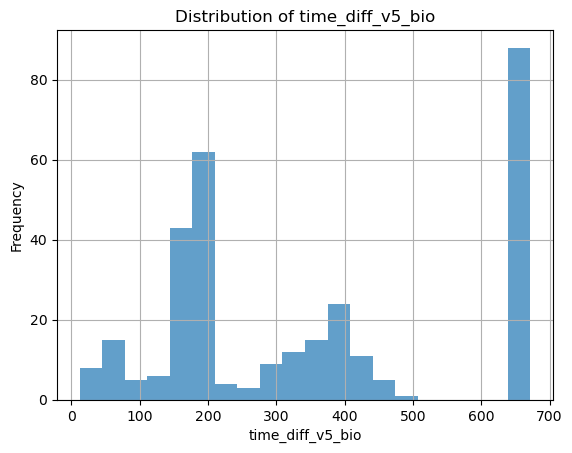

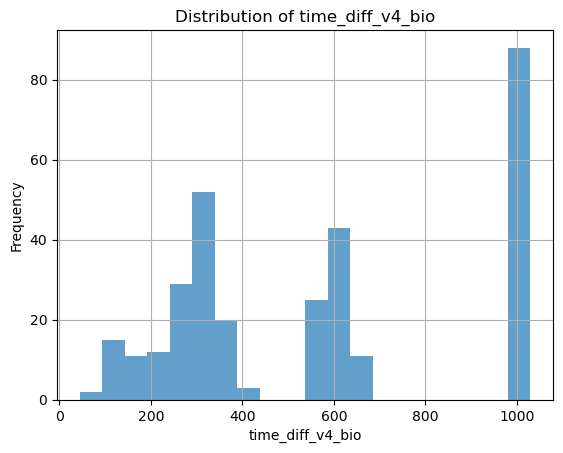

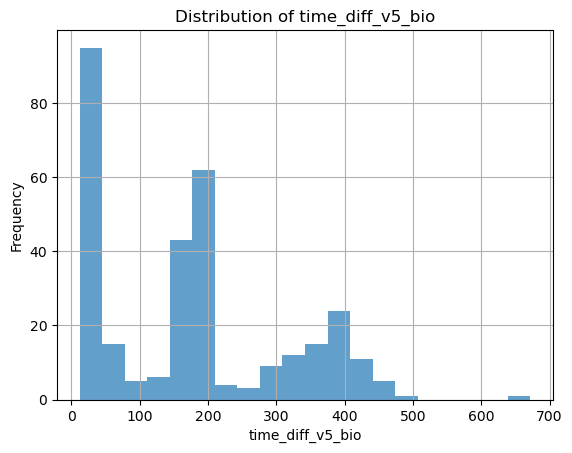

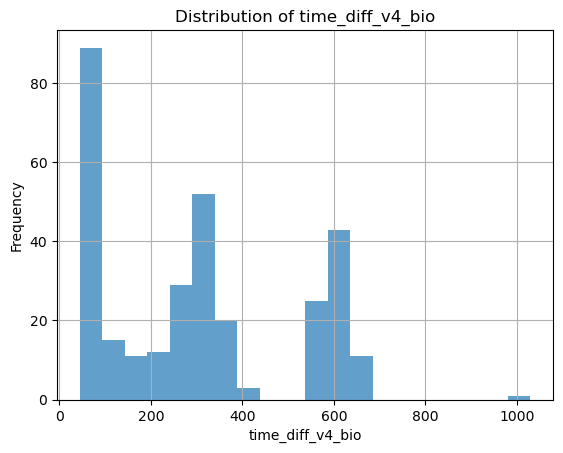

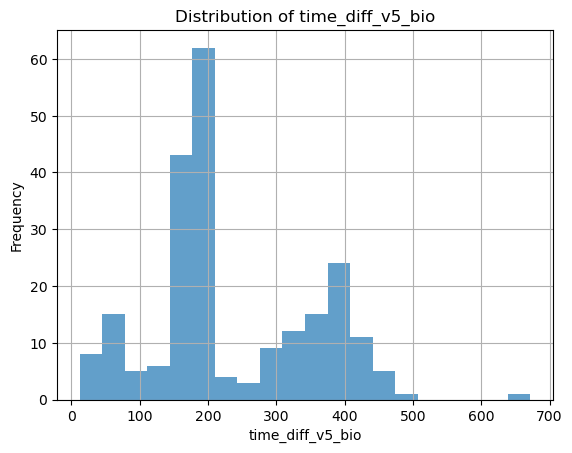

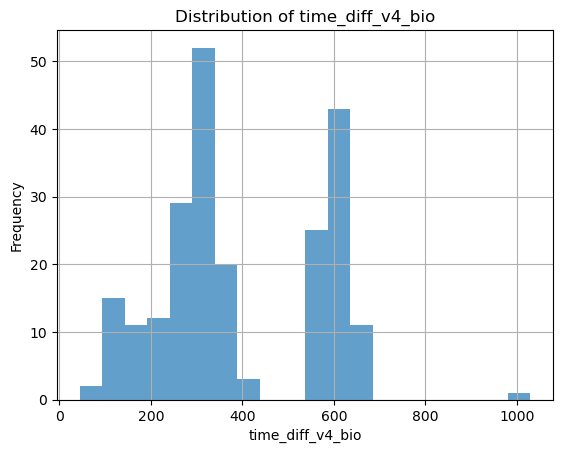

In [94]:
for col in ['time_diff_v5_bio', 'time_diff_v4_bio']:
    plt.figure()
    df_max[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in ['time_diff_v5_bio', 'time_diff_v4_bio']:
    plt.figure()
    df_min[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in ['time_diff_v5_bio', 'time_diff_v4_bio']:
    plt.figure()
    analysis_df[col].dropna().hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_all_analyses(cur_df):
    """
    Fits baseline, main-effects, and interaction models for:
      1) time_diff_v5_bio * BMI  (V5)
      2) time_diff_v4_bio * Smoking (V4)

    Then does:
       baseline -> main -> interaction ANOVA
    using a single baseline formula (including confounders + PCs).
    
    Returns a dictionary with:
      {
         "baseline_summary_v5": pd.DataFrame,
         "main_summary_v5": pd.DataFrame,
         "int_summary_v5": pd.DataFrame,
         "anova_v5": pd.DataFrame,
         "baseline_summary_v4": pd.DataFrame,
         "main_summary_v4": pd.DataFrame,
         "int_summary_v4": pd.DataFrame,
         "anova_v4": pd.DataFrame
      }
    which can then be written to Excel.
    """
    alpha = 0.05  # significance threshold
    
    # (1) Confounders + PCs
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    other_confounders = ["Age", "Race_1_0", "Race_2_0", "Race_3_0", 
                         "Sex_1_0", "Smoking_0_0", "Smoking_1_0"]
    # Baseline formula includes confounders + PCs (no time diffs).
    baseline_formula = "Epigenetic_deviation ~ " + " + ".join(other_confounders + pc_cols)
    
    # (2) Fit baseline on all rows we can (dropping NA in confounders + PCs).
    subset_baseline = cur_df.dropna(subset=other_confounders + pc_cols)
    if len(subset_baseline) < 5:
        baseline_model = None
        baseline_summary_df = pd.DataFrame({"Info": ["Not enough data for baseline"]})
    else:
        baseline_model = smf.ols(baseline_formula, data=subset_baseline).fit()
        # summary2().tables[1] is the coefficient table
        baseline_summary_df = baseline_model.summary2().tables[1]

    ##############################################################################
    # PART A: V5 (BMI)
    ##############################################################################
    subset_v5 = cur_df.dropna(subset=["time_diff_v5_bio", "BMI"] + other_confounders + pc_cols)
    
    # Main-effects formula (time_diff_v5_bio + BMI + confounders + PCs)
    main_formula_v5 = (
        "Epigenetic_deviation ~ time_diff_v5_bio + BMI + "
        + " + ".join(other_confounders + pc_cols)
    )
    # Interaction formula (time_diff_v5_bio * BMI + confounders + PCs)
    int_formula_v5 = (
        "Epigenetic_deviation ~ time_diff_v5_bio*BMI + "
        + " + ".join(other_confounders + pc_cols)
    )

    if len(subset_v5) < 5:
        main_model_v5 = None
        int_model_v5 = None
        main_summary_v5 = pd.DataFrame({"Info": ["Not enough data for main_v5"]})
        int_summary_v5 = pd.DataFrame({"Info": ["Not enough data for int_v5"]})
        anova_v5_df = pd.DataFrame({"Info": ["Not enough data for ANOVA_v5"]})
    else:
        main_model_v5 = smf.ols(main_formula_v5, data=subset_v5).fit()
        int_model_v5 = smf.ols(int_formula_v5, data=subset_v5).fit()

        main_summary_v5 = main_model_v5.summary2().tables[1]
        int_summary_v5 = int_model_v5.summary2().tables[1]

        # Compare baseline -> main -> interaction if baseline_model is also valid
        if baseline_model is not None:
            # We need the same rows for the F-test. So take the intersection:
            idx_v5 = subset_baseline.index.intersection(subset_v5.index)
            if len(idx_v5) < 5:
                anova_v5_df = pd.DataFrame({"Info": [f"Baseline & v5 intersection <5 rows. Found {len(idx_v5)}"]})
            else:
                # Re-fit baseline, main, int on the intersection
                baseline_refit_v5 = smf.ols(baseline_formula, data=subset_baseline.loc[idx_v5]).fit()
                main_refit_v5     = smf.ols(main_formula_v5, data=subset_v5.loc[idx_v5]).fit()
                int_refit_v5      = smf.ols(int_formula_v5, data=subset_v5.loc[idx_v5]).fit()
                anova_v5 = sm.stats.anova_lm(baseline_refit_v5, main_refit_v5, int_refit_v5, typ=1)
                anova_v5["Model"] = ["baseline", "main_v5", "int_v5"]
                anova_v5_df = anova_v5
        else:
            anova_v5_df = pd.DataFrame({"Info": ["No baseline model fitted."]})

    ##############################################################################
    # PART B: V4 (SMOKING)
    ##############################################################################
    subset_v4 = cur_df.dropna(
        subset=["time_diff_v4_bio", "Smoking_0_0", "Smoking_1_0"] + other_confounders + pc_cols
    )

    # Main formula (time_diff_v4_bio + Smoking + confounders + PCs)
    main_formula_v4 = (
        "Epigenetic_deviation ~ time_diff_v4_bio + Smoking_0_0 + Smoking_1_0 + "
        + " + ".join(other_confounders + pc_cols)
    )
    # Interaction formula (time_diff_v4_bio*Smoking + confounders + PCs)
    int_formula_v4 = (
        "Epigenetic_deviation ~ time_diff_v4_bio*Smoking_0_0 + time_diff_v4_bio*Smoking_1_0 + "
        + " + ".join(other_confounders + pc_cols)
    )

    if len(subset_v4) < 5:
        main_model_v4 = None
        int_model_v4 = None
        main_summary_v4 = pd.DataFrame({"Info": ["Not enough data for main_v4"]})
        int_summary_v4 = pd.DataFrame({"Info": ["Not enough data for int_v4"]})
        anova_v4_df = pd.DataFrame({"Info": ["Not enough data for ANOVA_v4"]})
    else:
        main_model_v4 = smf.ols(main_formula_v4, data=subset_v4).fit()
        int_model_v4 = smf.ols(int_formula_v4, data=subset_v4).fit()

        main_summary_v4 = main_model_v4.summary2().tables[1]
        int_summary_v4 = int_model_v4.summary2().tables[1]

        # Compare baseline-> main-> interaction if baseline_model is valid
        if baseline_model is not None:
            # Intersection
            idx_v4 = subset_baseline.index.intersection(subset_v4.index)
            if len(idx_v4) < 5:
                anova_v4_df = pd.DataFrame({"Info": [f"Baseline & v4 intersection <5 rows. Found {len(idx_v4)}"]})
            else:
                baseline_refit_v4 = smf.ols(baseline_formula, data=subset_baseline.loc[idx_v4]).fit()
                main_refit_v4     = smf.ols(main_formula_v4, data=subset_v4.loc[idx_v4]).fit()
                int_refit_v4      = smf.ols(int_formula_v4, data=subset_v4.loc[idx_v4]).fit()
                anova_v4 = sm.stats.anova_lm(baseline_refit_v4, main_refit_v4, int_refit_v4, typ=1)
                anova_v4["Model"] = ["baseline", "main_v4", "int_v4"]
                anova_v4_df = anova_v4
        else:
            anova_v4_df = pd.DataFrame({"Info": ["No baseline model fitted."]})
    
    # Return all results in a dictionary
    return {
      "baseline_summary" : baseline_summary_df,
      "main_summary_v5"  : main_summary_v5,
      "int_summary_v5"   : int_summary_v5,
      "anova_v5"         : anova_v5_df,
      "main_summary_v4"  : main_summary_v4,
      "int_summary_v4"   : int_summary_v4,
      "anova_v4"         : anova_v4_df
    }

def interaction_test_sensitivity_analysis(analysis_df, df_min, df_max):
    """
    Runs run_all_analyses() on Original (analysis_df), MinBound (df_min), and MaxBound (df_max).
    Saves results (model summaries + ANOVA) to 'interaction_test_sensitivity_analysis.xlsx'.
    """

    # We'll gather results for each dataset into a dict of DataFrames for Excel
    dfs_for_excel = {}

    for name, cur_df in zip(["Original", "MinBound", "MaxBound"], 
                            [analysis_df, df_min, df_max]):
        print(f"\n\n########################")
        print(f"RUNNING ANALYSES ON: {name}")
        print("########################")
        results_dict = run_all_analyses(cur_df)

        # Store each result in a sheet named f"{name}_..."
        for key, df_ in results_dict.items():
            # e.g. key = "anova_v5" => sheet name = "Original_anova_v5"
            sheet_name = f"{name}_{key}"
            dfs_for_excel[sheet_name] = df_

    # Now write everything to Excel
    excel_name = "Interaction_Tests/Confounders/interaction_test_sensitivity_analysis.xlsx"
    with pd.ExcelWriter(excel_name, engine="xlsxwriter") as writer:
        for sheet, df_ in dfs_for_excel.items():
            #df_.to_excel(writer, sheet_name=sheet[:31], index=True)
            # sheet names must be <= 31 chars, so slice if needed
            pass

    print(f"\nAll results have been saved to '{excel_name}'. "
          "Sheets are named <Dataset>_<ResultKey> (e.g. Original_anova_v5).")
    
interaction_test_sensitivity_analysis(analysis_df, df_min, df_max)




########################
RUNNING ANALYSES ON: Original
########################


########################
RUNNING ANALYSES ON: MinBound
########################


########################
RUNNING ANALYSES ON: MaxBound
########################

All results have been saved to 'Interaction_Tests/Confounders/interaction_test_sensitivity_analysis.xlsx'. Sheets are named <Dataset>_<ResultKey> (e.g. Original_anova_v5).


In [91]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def little_mcar_test(data):
    """
    Perform Little's MCAR test on a pandas DataFrame.
    Returns:
       chi_square, dof, p_value
    Reference for formula: Little, R. J. A. (1988). "A test of Missing Completely at Random for multivariate data 
    with missing values." Journal of the American Statistical Association, 83, 1198–1202.
    """

    # Only use columns with at least some missing
    cols_with_missing = data.columns[data.isnull().any()].tolist()
    if len(cols_with_missing) == 0:
        raise ValueError("No missing values in the dataset. Little's MCAR test not applicable.")

    # Work on a copy
    d = data[cols_with_missing].copy()

    # Identify unique missing-data patterns
    # pattern: which columns are missing in each row
    patterns = d.isnull().astype(int).apply(lambda row: tuple(row), axis=1)
    d['pattern_id'] = patterns.factorize()[0]

    # For each pattern, compute the means & cov of the non-missing data
    group_stats = []
    for pid, group in d.groupby('pattern_id'):
        # Subset non-missing columns for that pattern
        # (some columns are always missing in that pattern)
        non_missing_cols = [col for col in cols_with_missing
                            if group[col].isnull().sum() == 0]
        sub = group[non_missing_cols]

        if sub.empty:
            continue

        # Means, Cov
        mean_vec = sub.mean().values
        cov_mat = np.cov(sub.T, ddof=1)  # sample covariance
        n_g = len(sub)

        group_stats.append((pid, non_missing_cols, mean_vec, cov_mat, n_g))

    # Now compute the overall means using complete cases for each column
    overall_means = d[cols_with_missing].mean(skipna=True).values

    # Build test statistic
    chi_square = 0.0
    df = 0
    for pid, non_missing_cols, mean_vec, cov_mat, n_g in group_stats:
        # Extract the overall means for these columns
        idx_cols = [cols_with_missing.index(c) for c in non_missing_cols]
        omc = overall_means[idx_cols]

        # Weighted distance
        diff = (mean_vec - omc).reshape(-1, 1)
        if cov_mat.shape[0] != diff.shape[0]:
            # if there's an issue with single-col patterns => skip
            continue

        try:
            inv_cov = np.linalg.inv(cov_mat)
        except np.linalg.LinAlgError:
            # if singular, skip or do regularization
            continue

        chi_square_part = n_g * diff.T @ inv_cov @ diff
        chi_square += chi_square_part[0, 0]
        df += len(non_missing_cols)

    p_value = 1 - chi2.cdf(chi_square, df)
    return chi_square, df, p_value

# Example usage:
# df = pd.read_csv('your_data.csv')

littles_df = analysis_df.drop(columns=['others_v1_date', 'others_v2_date',
       'others_v3_date', 'others_v4_date', 'others_v5_date',
       'others_Saliva_collection_date'])

chi2_val, dof, pval = little_mcar_test(littles_df)
print("Little's MCAR test: Chi-square =", chi2_val, "df =", dof, "p-value =", pval)


Little's MCAR test: Chi-square = 0.0 df = 3 p-value = 1.0


In [93]:
df = analysis_df

df["time_diff_v4_missing"] = df["time_diff_v4_bio"].isna().astype(int)

import numpy as np
import pandas as pd
import scipy.stats as st

# 1) Numeric variables (e.g., Age)
missing_group = df.loc[df["time_diff_v4_missing"] == 1, "Age"].dropna()
nonmissing_group = df.loc[df["time_diff_v4_missing"] == 0, "Age"].dropna()

t_stat, p_val = st.ttest_ind(missing_group, nonmissing_group, equal_var=False)
print("Age difference by time_diff_v4_missing:")
print("t =", t_stat, "p =", p_val)

# 2) Categorical variables (e.g., Sex, coded 0/1 or 1/0)
contingency_table = pd.crosstab(df["Sex_1_0"], df["time_diff_v4_missing"])
chi2_stat, chi2_p, dof, expected = st.chi2_contingency(contingency_table)
print("Sex vs. time_diff_v4_missing: chi2 =", chi2_stat, "p =", chi2_p)


Age difference by time_diff_v4_missing:
t = -2.276765878888832 p = 0.02442207871490589
Sex vs. time_diff_v4_missing: chi2 = 0.8348362177973736 p = 0.3608778037030195


In [96]:
import numpy as np
import pandas as pd
import scipy.stats as st

# Create the missingness indicator if not already done
df["time_diff_v4_missing"] = df["time_diff_v4_bio"].isna().astype(int)

# === Numeric Variables: Age, BMI ===

for num_var in ["Age", "BMI"]:
    missing_group = df.loc[df["time_diff_v4_missing"] == 1, num_var].dropna()
    nonmissing_group = df.loc[df["time_diff_v4_missing"] == 0, num_var].dropna()

    if len(missing_group) > 1 and len(nonmissing_group) > 1:
        t_stat, p_val = st.ttest_ind(missing_group, nonmissing_group, equal_var=False)
        print(f"\n[{num_var}] difference by time_diff_v4_missing:")
        print("   t =", t_stat, "   p =", p_val)
    else:
        print(f"\n[{num_var}] - insufficient data for t-test (one of the groups is empty).")

# === Categorical Variables: Sex, Smoking, Race ===
# Assuming you have dummy columns: Sex_1_0, Race_1_0, Race_2_0, Race_3_0, etc.
# and Smoking_0_0, Smoking_1_0 for smoking status (or however they are coded).

categorical_vars = [
    "Sex_1_0",          # or however sex is coded
    "Smoking_0_0",      # or your actual smoking dummies
    "Smoking_1_0",
    "Race_1_0",
    "Race_2_0",
    "Race_3_0"
]

for cat_var in categorical_vars:
    # Build contingency table
    contingency_table = pd.crosstab(df[cat_var], df["time_diff_v4_missing"])

    # Check if table is not empty or degenerate
    if contingency_table.shape[0] < 2:
        print(f"\n[{cat_var}] - not enough categories for chi-square test.")
        continue

    chi2_stat, chi2_p, dof, expected = st.chi2_contingency(contingency_table)
    print(f"\n[{cat_var}] vs. time_diff_v4_missing:")
    print("   chi2 =", chi2_stat, "   p =", chi2_p)



[Age] difference by time_diff_v4_missing:
   t = -2.276765878888832    p = 0.02442207871490589

[BMI] difference by time_diff_v4_missing:
   t = 0.4387637894279779    p = 0.6613965952605998

[Sex_1_0] vs. time_diff_v4_missing:
   chi2 = 0.8348362177973736    p = 0.3608778037030195

[Smoking_0_0] vs. time_diff_v4_missing:
   chi2 = 1.7861516333663483    p = 0.1813957520391443

[Smoking_1_0] vs. time_diff_v4_missing:
   chi2 = 0.03556539825105631    p = 0.8504158124181455

[Race_1_0] vs. time_diff_v4_missing:
   chi2 = 42.59683341470825    p = 6.726819709366161e-11

[Race_2_0] vs. time_diff_v4_missing:
   chi2 = 14.962301693803091    p = 0.0001096806340745601

[Race_3_0] vs. time_diff_v4_missing:
   chi2 = 9.703002677364049    p = 0.001839671651837543


In [97]:
import numpy as np
import pandas as pd
import scipy.stats as st

# Create the missingness indicator if not already done
df["time_diff_v5_missing"] = df["time_diff_v5_bio"].isna().astype(int)

# === Numeric Variables: Age, BMI ===

for num_var in ["Age", "BMI"]:
    missing_group = df.loc[df["time_diff_v5_missing"] == 1, num_var].dropna()
    nonmissing_group = df.loc[df["time_diff_v5_missing"] == 0, num_var].dropna()

    if len(missing_group) > 1 and len(nonmissing_group) > 1:
        t_stat, p_val = st.ttest_ind(missing_group, nonmissing_group, equal_var=False)
        print(f"\n[{num_var}] difference by time_diff_v5_missing:")
        print("   t =", t_stat, "   p =", p_val)
    else:
        print(f"\n[{num_var}] - insufficient data for t-test (one of the groups is empty).")

# === Categorical Variables: Sex, Smoking, Race ===
# Assuming you have dummy columns: Sex_1_0, Race_1_0, Race_2_0, Race_3_0, etc.
# and Smoking_0_0, Smoking_1_0 for smoking status (or however they are coded).

categorical_vars = [
    "Sex_1_0",          # or however sex is coded
    "Smoking_0_0",      # or your actual smoking dummies
    "Smoking_1_0",
    "Race_1_0",
    "Race_2_0",
    "Race_3_0"
]

for cat_var in categorical_vars:
    # Build contingency table
    contingency_table = pd.crosstab(df[cat_var], df["time_diff_v5_missing"])

    # Check if table is not empty or degenerate
    if contingency_table.shape[0] < 2:
        print(f"\n[{cat_var}] - not enough categories for chi-square test.")
        continue

    chi2_stat, chi2_p, dof, expected = st.chi2_contingency(contingency_table)
    print(f"\n[{cat_var}] vs. time_diff_v5_missing:")
    print("   chi2 =", chi2_stat, "   p =", chi2_p)



[Age] difference by time_diff_v5_missing:
   t = -2.276765878888832    p = 0.02442207871490589

[BMI] difference by time_diff_v5_missing:
   t = 0.4387637894279779    p = 0.6613965952605998

[Sex_1_0] vs. time_diff_v5_missing:
   chi2 = 0.8348362177973736    p = 0.3608778037030195

[Smoking_0_0] vs. time_diff_v5_missing:
   chi2 = 1.7861516333663483    p = 0.1813957520391443

[Smoking_1_0] vs. time_diff_v5_missing:
   chi2 = 0.03556539825105631    p = 0.8504158124181455

[Race_1_0] vs. time_diff_v5_missing:
   chi2 = 42.59683341470825    p = 6.726819709366161e-11

[Race_2_0] vs. time_diff_v5_missing:
   chi2 = 14.962301693803091    p = 0.0001096806340745601

[Race_3_0] vs. time_diff_v5_missing:
   chi2 = 9.703002677364049    p = 0.001839671651837543


In [96]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from miceforest import ImputationKernel
from scipy.stats import norm

###############################################################################
# 0) Custom Rubin’s Rules function for a single parameter ("scalar") at a time
###############################################################################
def pool_scalar_rubins(estimates, variances, m=None):
    """
    Implements Rubin's Rules for a single parameter across multiple imputations.
    Returns a dict with:
      'qbar': pooled estimate,
      'ubar': mean of within-imputation variances,
      'b': between-imputation variance,
      't': total variance.
    Then you can compute std_error = sqrt(t).
    """
    estimates = np.array(estimates, dtype=float)
    variances = np.array(variances, dtype=float)
    
    if m is None:
        m = len(estimates)

    qbar = np.mean(estimates)  # (1) Mean of the estimates (Q_j)
    ubar = np.mean(variances)  # (2) Within-imputation variance
    b = np.sum((estimates - qbar)**2) / (m - 1)  # (3) Between-imputation var
    t = ubar + (1 + 1/m) * b                    # (4) Total variance
    
    return {
        "qbar": qbar,  # pooled estimate
        "ubar": ubar,
        "b": b,
        "t": t
    }

###############################################################################
# STEP 1: Function that fits baseline, main, and interaction for v4 (Smoking)
#         and v5 (BMI), then compares them via ANOVA.
###############################################################################
def run_all_analyses(cur_df, verbose=True):
    """
    Returns dict of fitted model objects:
      {
        "baseline_v5": baseline model (v5),
        "main_v5":     main model (v5),
        "int_v5":      interaction model (v5),
        "anova_v5":    ANOVA table for v5,
        "baseline_v4": baseline model (v4),
        "main_v4":     main model (v4),
        "int_v4":      interaction model (v4),
        "anova_v4":    ANOVA table for v4
      }
    """

    alpha = 0.05

    # Principal components + confounders
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    confounders = ["Age", "Race_1_0", "Race_2_0", "Race_3_0", 
                   "Sex_1_0", "Smoking_0_0", "Smoking_1_0", "BMI"]
    conf_plus_pcs = confounders + pc_cols

    ###########################################################################
    # PART A: v5 (BMI)
    ###########################################################################
    # Baseline (v5): all confounders + PCs, no time_diff_v5_bio
    baseline_formula_v5 = "Epigenetic_deviation ~ " + " + ".join(conf_plus_pcs)
    # Main (v5): same as baseline + time_diff_v5_bio
    main_formula_v5 = "Epigenetic_deviation ~ time_diff_v5_bio + " + " + ".join(conf_plus_pcs)
    # Interaction (v5): time_diff_v5_bio*BMI + rest
    int_formula_v5 = "Epigenetic_deviation ~ time_diff_v5_bio*BMI + " + " + ".join(conf_plus_pcs)

    subset_v5 = cur_df.dropna(subset=["time_diff_v5_bio", "BMI"])
    if len(subset_v5) < 5:
        baseline_v5 = main_v5 = int_v5 = None
        anova_v5 = None
    else:
        baseline_v5 = smf.ols(baseline_formula_v5, data=subset_v5).fit()
        main_v5 = smf.ols(main_formula_v5, data=subset_v5).fit()
        int_v5 = smf.ols(int_formula_v5, data=subset_v5).fit()
        anova_v5 = sm.stats.anova_lm(baseline_v5, main_v5, int_v5, typ=1)

    ###########################################################################
    # PART B: v4 (Smoking)
    ###########################################################################
    # Baseline (v4): all confounders + PCs, no time_diff_v4_bio
    baseline_formula_v4 = "Epigenetic_deviation ~ " + " + ".join(conf_plus_pcs)
    # Main (v4): add time_diff_v4_bio
    main_formula_v4 = "Epigenetic_deviation ~ time_diff_v4_bio + " + " + ".join(conf_plus_pcs)
    # Interaction (v4): time_diff_v4_bio*Smoking_0_0 + time_diff_v4_bio*Smoking_1_0
    int_formula_v4 = (
        "Epigenetic_deviation ~ time_diff_v4_bio*Smoking_0_0 + time_diff_v4_bio*Smoking_1_0 + "
        + " + ".join(conf_plus_pcs)
    )

    subset_v4 = cur_df.dropna(subset=["time_diff_v4_bio", "Smoking_0_0", "Smoking_1_0"])
    if len(subset_v4) < 5:
        baseline_v4 = main_v4 = int_v4 = None
        anova_v4 = None
    else:
        baseline_v4 = smf.ols(baseline_formula_v4, data=subset_v4).fit()
        main_v4 = smf.ols(main_formula_v4, data=subset_v4).fit()
        int_v4 = smf.ols(int_formula_v4, data=subset_v4).fit()
        anova_v4 = sm.stats.anova_lm(baseline_v4, main_v4, int_v4, typ=1)

    # Optional printing
    if verbose:
        print("\n=== [V5: BMI] ===")
        print("--- Baseline formula (v5) ---")
        print(baseline_formula_v5)
        print("--- Main (v5) formula ---")
        print(main_formula_v5)
        print("--- Interaction (v5) formula ---")
        print(int_formula_v5)
        print("\nANOVA: Baseline → Main → Interaction (v5)")
        print(anova_v5)
        if int_v5 is not None:
            sig_v5 = int_v5.pvalues[int_v5.pvalues < alpha]
            if len(sig_v5) > 0:
                print(f"\nSignificant (p<{alpha}) terms in int_v5:")
                print(sig_v5)
            else:
                print("\nNo significant (p<0.05) terms in int_v5.")

        print("\n=== [V4: SMOKING] ===")
        print("--- Baseline formula (v4) ---")
        print(baseline_formula_v4)
        print("--- Main (v4) formula ---")
        print(main_formula_v4)
        print("--- Interaction (v4) formula ---")
        print(int_formula_v4)
        print("\nANOVA: Baseline → Main → Interaction (v4)")
        print(anova_v4)
        if int_v4 is not None:
            sig_v4 = int_v4.pvalues[int_v4.pvalues < alpha]
            if len(sig_v4) > 0:
                print(f"\nSignificant (p<{alpha}) terms in int_v4:")
                print(sig_v4)
            else:
                print("\nNo significant (p<0.05) terms in int_v4.")

    return {
        "baseline_v5": baseline_v5,
        "main_v5": main_v5,
        "int_v5": int_v5,
        "anova_v5": anova_v5,
        "baseline_v4": baseline_v4,
        "main_v4": main_v4,
        "int_v4": int_v4,
        "anova_v4": anova_v4
    }


###############################################################################
# STEP 2: MICE for time_diff variables, compare models, pool all (baseline/main/int)
#         for v4 and v5, then save everything to 'results.xlsx'.
###############################################################################
def multiple_imputation_and_comparison(analysis_df):
    """
    1. MICE on time_diff_v4_bio, time_diff_v5_bio, etc.
    2. run_all_analyses on each imputed dataset
    3. Pool the coefficients for baseline_v5, main_v5, int_v5, baseline_v4, main_v4, int_v4
    4. Save ANOVA details & pooled results to 'results.xlsx'
    """

    #for re-use later
    global kernel

    ### (A) PREPARE DATA & MICE ###
    mice_vars = [
        "time_diff_v4_bio", "time_diff_v5_bio",
        "Age", "Race_1_0", "Race_2_0", "Race_3_0", "Sex_1_0", "BMI",
        "Smoking_0_0", "Smoking_1_0",
        "PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",
        "Epigenetic_deviation"
    ]
    df_mice = analysis_df[mice_vars].copy()

    m = 5  # number of imputed datasets
    kernel = ImputationKernel(
        data=df_mice,
        save_all_iterations=True,
        random_state=42,
        datasets=m
    )
    kernel.mice(10)

    ### (B) RUN ANALYSES ON EACH IMPUTED DATASET ###
    results_all = []
    for i in range(m):
        df_imputed = kernel.complete_data(dataset=i, inplace=False)
        models_dict = run_all_analyses(df_imputed, verbose=True)
        results_all.append(models_dict)

    ### (C) POOLING & STORING RESULTS ###
    # We'll pool the following six models:
    model_names_to_pool = [
        "baseline_v5", "main_v5", "int_v5",
        "baseline_v4", "main_v4", "int_v4"
    ]
    # We also want to store ANOVA outputs from each imputation.

    # We'll create a dictionary of DataFrames to write to Excel
    # Key = sheet name, Value = DataFrame
    dfs_for_excel = {}

    # (1) Collect ANOVA data from each imputation
    anova_records_v5 = []
    anova_records_v4 = []

    for i, mdict in enumerate(results_all):
        anova_v5 = mdict["anova_v5"]
        if anova_v5 is not None:
            df_ = anova_v5.copy()
            df_["imputation_id"] = i
            anova_records_v5.append(df_)

        anova_v4 = mdict["anova_v4"]
        if anova_v4 is not None:
            df_ = anova_v4.copy()
            df_["imputation_id"] = i
            anova_records_v4.append(df_)

    if anova_records_v5:
        dfs_for_excel["anova_v5"] = pd.concat(anova_records_v5)
    if anova_records_v4:
        dfs_for_excel["anova_v4"] = pd.concat(anova_records_v4)

    # (2) For each model_name in model_names_to_pool, do Rubin’s pooling
    for model_name in model_names_to_pool:
        coefs = []
        covs = []
        valid_count = 0
        for i, mdict in enumerate(results_all):
            mod = mdict.get(model_name)
            if mod is not None:
                coefs.append(mod.params)
                covs.append(mod.cov_params())
                valid_count += 1

        if valid_count == 0:
            # No model fitted across imputations
            not_found_df = pd.DataFrame({"info": [f"{model_name} not fitted in any dataset"]})
            dfs_for_excel[f"pooled_{model_name}"] = not_found_df
            continue

        # Pool each parameter
        pooled_estimates = {}
        pooled_std_errors = {}

        param_names = coefs[0].index
        for param_name in param_names:
            estimates = [c[param_name] for c in coefs]
            variances = [cov[param_name][param_name] for cov in covs]
            pooled_res = pool_scalar_rubins(estimates, variances, m=len(estimates))
            qbar = pooled_res["qbar"]
            tvar = pooled_res["t"]
            se = np.sqrt(tvar)

            pooled_estimates[param_name] = qbar
            pooled_std_errors[param_name] = se

        df_pooled = pd.DataFrame({
            "Estimate": pooled_estimates,
            "Std_Error": pooled_std_errors
        })
        df_pooled["z_value"] = df_pooled["Estimate"] / df_pooled["Std_Error"]
        df_pooled["p_value"] = 2 * (1 - norm.cdf(np.abs(df_pooled["z_value"])))

        dfs_for_excel[f"pooled_{model_name}"] = df_pooled

    ### (D) WRITE EVERYTHING TO EXCEL ###
    with pd.ExcelWriter("Interaction_Tests/Confounders/interaction_test_imputed.xlsx", engine="xlsxwriter") as writer:
        for sheetname, df_ in dfs_for_excel.items():
            #df_.to_excel(writer, sheet_name=sheetname)
            pass

    print("\n=== Results saved to 'results.xlsx' ===")
    print("Sheets include: anova_v5, anova_v4, plus pooled_* for baseline_v5, main_v5, int_v5, baseline_v4, main_v4, int_v4.")


In [97]:
multiple_imputation_and_comparison(analysis_df)


=== [V5: BMI] ===
--- Baseline formula (v5) ---
Epigenetic_deviation ~ Age + Race_1_0 + Race_2_0 + Race_3_0 + Sex_1_0 + Smoking_0_0 + Smoking_1_0 + BMI + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
--- Main (v5) formula ---
Epigenetic_deviation ~ time_diff_v5_bio + Age + Race_1_0 + Race_2_0 + Race_3_0 + Sex_1_0 + Smoking_0_0 + Smoking_1_0 + BMI + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
--- Interaction (v5) formula ---
Epigenetic_deviation ~ time_diff_v5_bio*BMI + Age + Race_1_0 + Race_2_0 + Race_3_0 + Sex_1_0 + Smoking_0_0 + Smoking_1_0 + BMI + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10

ANOVA: Baseline → Main → Interaction (v5)
   df_resid          ssr  df_diff    ss_diff         F    Pr(>F)
0     292.0  9468.490187      0.0        NaN       NaN       NaN
1     291.0  9466.556813      1.0   1.933374  0.059679  0.807176
2     290.0  9394.861156      1.0  71.695657  2.213097  0.137930

Significant (p<0.05) terms in int_v5:
Intercept    

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def final_merged_analysis(analysis_df, outcome, time_main, outcome_sheet_labels=None):
    """
    1) Baseline model:
       - baseline_has_time: fit on data that has at least one time diff (v1 or v5)
    2) Main & interaction for v1 and v5
    3) ANOVA: baseline_has_time vs. main vs. interaction (three models) on
       the intersection of rows, for each v4 & v5. 
    4) Save the ANOVA tables FIRST, then model summaries, to 'merged_results.xlsx'.
    
    Parameters:
    - analysis_df: pandas DataFrame containing the data
    - outcome: str, the outcome variable
    - time_main: str, the main time variable
    - outcome_sheet_labels: dict, optional mapping from outcome to sheet label
    """

    ###########################################################################
    # (A) Confounders + Predictors
    ###########################################################################
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    baseline_predictors = pc_cols

    baseline_formula = f"{outcome} ~ " + " + ".join(baseline_predictors)

    # Prepare a dictionary of DataFrames to be written to Excel
    # We’ll add the ANOVA sheets first, then the model summaries
    dfs_for_excel = {}

    ###########################################################################
    # (B)  Baseline Model
    ###########################################################################

    # Baseline (has-time)
    subset_has_time = analysis_df[
        (analysis_df["time_diff_v1_bio"].notna()) | (analysis_df["time_diff_v5_bio"].notna())
    ].dropna(subset=baseline_predictors)

    if len(subset_has_time) < 5:
        baseline_has_time_model = None
        dfs_for_excel["baseline_has_time"] = pd.DataFrame(
            {"Info": ["Not enough samples for baseline_has_time"]}
        )
    else:
        baseline_has_time_model = smf.ols(baseline_formula, data=subset_has_time).fit()
        dfs_for_excel["baseline_has_time"] = baseline_has_time_model.summary2().tables[1]

    ###########################################################################
    # (C) MAIN + INTERACTION FOR V5 (BMI)
    ###########################################################################
    interaction_terms = [f"{time_main}*PC{i}" for i in range(1, 11)]
    
    subset_known_v = analysis_df.dropna(
        subset=["time_diff_v5_bio", "BMI"] + baseline_predictors
    )
    main_formula_v = (
        f"{outcome} ~ {time_main} + " 
        + " + ".join(baseline_predictors)
    )
    int_formula_v = (
        f"{outcome} ~ {time_main} + " 
        + " + ".join(baseline_predictors) + " + "
        + " + ".join(interaction_terms)
    )

    if len(subset_known_v) < 5:
        model_main_v = None
        model_int_v = None
        dfs_for_excel["main_v"] = pd.DataFrame({"Info": ["Not enough data for main_v"]})
        dfs_for_excel["int_v"] = pd.DataFrame({"Info": ["Not enough data for int_v"]})
    else:
        model_main_v = smf.ols(main_formula_v, data=subset_known_v).fit()
        model_int_v = smf.ols(int_formula_v, data=subset_known_v).fit()

        dfs_for_excel[f"main_{outcome}"] = model_main_v.summary2().tables[1]
        dfs_for_excel[f"int_{outcome}"] = model_int_v.summary2().tables[1]

    ###########################################################################
    # (E) 3-MODEL ANOVA: baseline_has_time vs. main vs. interaction
    ###########################################################################
    # We'll do this if all three models exist, then re-fit them on the intersection of data
    # so that the comparison is fair.

    def three_model_anova(baseline_model, baseline_subset, main_model, main_subset,
                          int_model, int_subset, label_main, label_int):
        """
        Attempt an ANOVA with: baseline_has_time, main, interaction 
        on the intersection of their data.
        """
        if not (baseline_model and main_model and int_model):
            return pd.DataFrame({"Error": ["One or more models is None"]})
        # Intersection of row indices
        idx = baseline_subset.index.intersection(main_subset.index).intersection(int_subset.index)
        if len(idx) < 5:
            return pd.DataFrame({"Error": [f"Intersection < 5 rows. Found {len(idx)}."]})

        # Re-fit each model on that intersection
        bf = baseline_model.model.formula
        mf = main_model.model.formula
        intf = int_model.model.formula

        base_refit = smf.ols(bf, data=baseline_subset.loc[idx]).fit()
        main_refit = smf.ols(mf, data=main_subset.loc[idx]).fit()
        int_refit = smf.ols(intf, data=int_subset.loc[idx]).fit()

        try:
            anova_table = sm.stats.anova_lm(base_refit, main_refit, int_refit)
            anova_table["Model"] = ["baseline_has_time", label_main, label_int]
            return anova_table
        except ValueError as e:
            return pd.DataFrame({"Error": [str(e)]})

    # (E1) v5 ANOVA
    if baseline_has_time_model and model_main_v and model_int_v:
        anova_3_v = three_model_anova(
            baseline_has_time_model, subset_has_time,
            model_main_v, subset_known_v,
            model_int_v, subset_known_v,
            f"main_{outcome}", f"int_{outcome}"
        )
        # put this at the front of the Excel
        dfs_for_excel["ANOVA_v"] = anova_3_v

    ###########################################################################
    # (F) WRITE EVERYTHING TO EXCEL
    # We'll reorder the dictionary so the ANOVA sheets appear first
    ###########################################################################
    # Define a default sheet label mapping if none provided
    if outcome_sheet_labels is None:
        outcome_sheet_labels = {
            "phy_perf_sppbs_total_score_consolidated": "SPPBS"
            # Add other mappings here if needed
        }

    # Get the sheet label, default to outcome if not mapped
    sheet_label = outcome_sheet_labels.get(outcome, outcome)

    # Define sheet order with the mapped sheet label
    sheet_order = [
        "ANOVA_v",
        "baseline_has_time",
        f"main_{sheet_label}", 
        f"int_{sheet_label}"
    ]

    # Build an ordered dictionary for writing
    final_dfs_for_excel = {}
    for sht in sheet_order:
        if sht in dfs_for_excel:
            final_dfs_for_excel[sht] = dfs_for_excel[sht]

    # then add any others that might exist but not in sheet_order
    for k, v in dfs_for_excel.items():
        if k not in final_dfs_for_excel:
            final_dfs_for_excel[k] = v

    # Debug: Print what will be written
    print(f"\nWriting to Excel for outcome: {outcome}")
    for sheetname, df_ in final_dfs_for_excel.items():
        print(f" - Sheet: {sheetname}, Shape: {df_.shape}")

    with pd.ExcelWriter(f"{sheet_label}_non_imputed_interaction_test.xlsx", engine="xlsxwriter") as writer:
        for sheetname, df_ in final_dfs_for_excel.items():
            # Ensure sheet name is within 31 characters
            if len(sheetname) > 31:
                print(f"Warning: Sheet name '{sheetname}' exceeds 31 characters and will be truncated.")
                sheetname = sheetname[:31]
            df_.to_excel(writer, sheet_name=sheetname, index=True)

    print("\nFinal results saved. The first sheets are the "
          "three-model ANOVAs for v5 and v4, followed by baseline/main/interaction summaries.")

# Example usage:
# Define the mapping from outcome to sheet label
outcome_sheet_labels = {
    "cog_mmse_totalscore": "Cog_MMSE",
    "func_stat_badl_total": "BADL_total",
    "func_stat_iadl_score": "IADL_score",
    "phy_perf_sppbs_total_score_consolidated": "SPPBS"
}

outcomes = [
    "cog_mmse_totalscore",
    "func_stat_badl_total",
    "func_stat_iadl_score",
    "phy_perf_sppbs_total_score_consolidated"
]

time_diffs = [
    "time_diff_v1_bio",
    "time_diff_v1_bio",
    "time_diff_v1_bio",
    "time_diff_v5_bio"
]

# Assuming `analysis_df` is already defined and properly formatted
for outcome, time_diff in zip(outcomes, time_diffs):
    final_merged_analysis(analysis_df, outcome, time_diff, outcome_sheet_labels=outcome_sheet_labels)



Writing to Excel for outcome: cog_mmse_totalscore
 - Sheet: ANOVA_v, Shape: (3, 7)
 - Sheet: baseline_has_time, Shape: (11, 6)
 - Sheet: main_cog_mmse_totalscore, Shape: (12, 6)
 - Sheet: int_cog_mmse_totalscore, Shape: (22, 6)

Final results saved. The first sheets are the three-model ANOVAs for v5 and v4, followed by baseline/main/interaction summaries.

Writing to Excel for outcome: func_stat_badl_total
 - Sheet: ANOVA_v, Shape: (3, 7)
 - Sheet: baseline_has_time, Shape: (11, 6)
 - Sheet: main_func_stat_badl_total, Shape: (12, 6)
 - Sheet: int_func_stat_badl_total, Shape: (22, 6)

Final results saved. The first sheets are the three-model ANOVAs for v5 and v4, followed by baseline/main/interaction summaries.

Writing to Excel for outcome: func_stat_iadl_score
 - Sheet: ANOVA_v, Shape: (3, 7)
 - Sheet: baseline_has_time, Shape: (11, 6)
 - Sheet: main_func_stat_iadl_score, Shape: (12, 6)
 - Sheet: int_func_stat_iadl_score, Shape: (22, 6)

Final results saved. The first sheets are the 

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_all_analyses(cur_df, outcome, time_main, outcome_sheet_labels=None):
    """
    Fits baseline, main-effects, and interaction models for specified outcomes and time points.
    Then performs ANOVA comparing baseline, main, and interaction models.

    Parameters:
    - cur_df: pandas DataFrame containing the data
    - outcome: str, the outcome variable
    - time_main: str, the main time variable (e.g., "time_diff_v5_bio")
    - outcome_sheet_labels: dict, optional mapping from outcome to sheet label

    Returns:
    A dictionary with:
      {
         "baseline_summary": pd.DataFrame,
         "main_summary_<time_main>": pd.DataFrame,
         "int_summary_<time_main>": pd.DataFrame,
         "anova_<time_main>": pd.DataFrame
      }
      which can then be written to Excel.
    """
    alpha = 0.05  # significance threshold

    # Define outcome sheet labels
    if outcome_sheet_labels is None:
        outcome_sheet_labels = {}
    
    # (1) Confounders + PCs
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    other_confounders = ["Age", "Race_1_0", "Race_2_0", "Race_3_0", 
                         "Sex_1_0", "Smoking_0_0", "Smoking_1_0"]
    # Baseline formula includes confounders + PCs (no time diffs).
    baseline_formula = f"{outcome} ~ " + " + ".join(pc_cols)

    # (2) Fit baseline on all rows we can (dropping NA in confounders + PCs).
    subset_baseline = cur_df.dropna(subset=pc_cols)
    if len(subset_baseline) < 5:
        baseline_model = None
        baseline_summary_df = pd.DataFrame({"Info": ["Not enough data for baseline"]})
    else:
        baseline_model = smf.ols(baseline_formula, data=subset_baseline).fit()
        # summary2().tables[1] is the coefficient table
        baseline_summary_df = baseline_model.summary2().tables[1]

    ###########################################################################
    # PART A: MAIN + INTERACTION
    ###########################################################################
    # Define interaction terms based on time_main and PCs
    interaction_terms = [f"{time_main}*PC{i}" for i in range(1, 11)]
    
    # Define the subset based on time_main and other relevant variables
    subset_main_int = cur_df.dropna(
        subset=[time_main] + pc_cols
    )
    
    # Main-effects formula
    main_formula = (
        f"{outcome} ~ {time_main} + "
        + " + ".join(pc_cols)
    )
    
    # Interaction formula
    int_formula = (
        f"{outcome} ~ {time_main} + "
        + " + ".join(pc_cols) + " + "
        + " + ".join(interaction_terms)
    )

    if len(subset_main_int) < 5:
        main_model = None
        int_model = None
        main_summary = pd.DataFrame({"Info": [f"Not enough data for main_{time_main}"]})
        int_summary = pd.DataFrame({"Info": [f"Not enough data for int_{time_main}"]})
        anova_df = pd.DataFrame({"Info": [f"Not enough data for ANOVA_{time_main}"]})
    else:
        main_model = smf.ols(main_formula, data=subset_main_int).fit()
        int_model = smf.ols(int_formula, data=subset_main_int).fit()

        main_summary = main_model.summary2().tables[1]
        int_summary = int_model.summary2().tables[1]

        # Compare baseline -> main -> interaction if baseline_model is valid
        if baseline_model is not None:
            # Intersection of row indices
            idx = subset_baseline.index.intersection(subset_main_int.index)
            if len(idx) < 5:
                anova_df = pd.DataFrame({"Info": [f"Baseline & {time_main} intersection <5 rows. Found {len(idx)}"]})
            else:
                # Re-fit models on the intersection
                baseline_refit = smf.ols(baseline_formula, data=subset_baseline.loc[idx]).fit()
                main_refit = smf.ols(main_formula, data=subset_main_int.loc[idx]).fit()
                int_refit = smf.ols(int_formula, data=subset_main_int.loc[idx]).fit()
                
                try:
                    anova = sm.stats.anova_lm(baseline_refit, main_refit, int_refit, typ=1)
                    anova["Model"] = ["baseline", "main", "interaction"]
                    anova_df = anova
                except ValueError as e:
                    anova_df = pd.DataFrame({"Error": [str(e)]})
        else:
            anova_df = pd.DataFrame({"Info": ["No baseline model fitted."]})

    # Return all results in a dictionary
    return {
        "baseline_summary" : baseline_summary_df,
        f"main_summary_{time_main}"  : main_summary,
        f"int_summary_{time_main}"   : int_summary,
        f"anova_{time_main}"         : anova_df
    }

def interaction_test_sensitivity_analysis(analysis_df, df_min, df_max, outcome, time_main, outcome_sheet_labels=None):
    """
    Runs run_all_analyses() on Original (analysis_df), MinBound (df_min), and MaxBound (df_max).
    Saves results (model summaries + ANOVA) to an Excel file with appropriately labeled sheets.

    Parameters:
    - analysis_df: pandas DataFrame for Original dataset
    - df_min: pandas DataFrame for MinBound dataset
    - df_max: pandas DataFrame for MaxBound dataset
    - outcome: str, the outcome variable
    - time_main: str, the main time variable (e.g., "time_diff_v5_bio")
    - outcome_sheet_labels: dict, optional mapping from outcome to sheet label
    """
    # Define the mapping from outcome to sheet label if not provided
    if outcome_sheet_labels is None:
        outcome_sheet_labels = {}
    
    # Get the sheet label, default to outcome if not mapped
    sheet_label = outcome_sheet_labels.get(outcome, outcome)
    
    # We'll gather results for each dataset into a dict of DataFrames for Excel
    dfs_for_excel = {}
    
    for name, cur_df in zip(["MinBound", "MaxBound"], 
                            [df_min, df_max]):
        print(f"\n\n########################")
        print(f"RUNNING ANALYSES ON: {name}")
        print("########################")
        results_dict = run_all_analyses(cur_df, outcome, time_main, outcome_sheet_labels=outcome_sheet_labels)

        # Store each result in a sheet named f"{name}_..."
        for key, df_ in results_dict.items():
            # e.g., key = "anova_time_diff_v5_bio" => sheet name = "Original_anova_Epi_devi"
            if "anova_" in key:
                sheet_suffix = "anova_" + sheet_label
            elif "main_summary_" in key:
                sheet_suffix = "main_" + sheet_label
            elif "int_summary_" in key:
                sheet_suffix = "int_" + sheet_label
            else:
                sheet_suffix = key  # fallback, should not occur
            
            sheet_name = f"{name}_{sheet_suffix}"
            
            # Ensure sheet name is <=31 characters
            if len(sheet_name) > 31:
                print(f"Warning: Sheet name '{sheet_name}' exceeds 31 characters and will be truncated.")
                sheet_name = sheet_name[:31]
            
            dfs_for_excel[sheet_name] = df_
    
    # Now write everything to Excel
    excel_name = f"Interaction_Tests/Phenotypes/{sheet_label}_imputation_sensitivity_analysis.xlsx"
    with pd.ExcelWriter(excel_name, engine="xlsxwriter") as writer:
        for sheet, df_ in dfs_for_excel.items():
            df_.to_excel(writer, sheet_name=sheet, index=True)
    
    print(f"\nAll results have been saved to '{excel_name}'. "
          "Sheets are named <Dataset>_<ResultKey> (e.g., Original_anova_Epi_devi).")

# Define the mapping from outcome to sheet label
outcome_sheet_labels = {
    "phy_perf_sppbs_total_score_consolidated": "SPPBS",
    "cog_mmse_totalscore": "Cog_MMSE",
    "func_stat_badl_total": "BADL",
    "func_stat_iadl_score": "IADL",
}

# Define your outcomes and their corresponding main time variables
outcomes = [
    "cog_mmse_totalscore",
    "func_stat_badl_total",
    "func_stat_iadl_score",
    "phy_perf_sppbs_total_score_consolidated"
]

time_diffs = [
    "time_diff_v1_bio",
    "time_diff_v1_bio",
    "time_diff_v1_bio",
    "time_diff_v5_bio"
]

# Assuming `analysis_df`, `df_min`, and `df_max` are already defined and properly formatted
for outcome, time_diff in zip(outcomes, time_diffs):
    interaction_test_sensitivity_analysis(
        analysis_df=analysis_df,
        df_min=df_min,
        df_max=df_max,
        outcome=outcome,
        time_main=time_diff,
        outcome_sheet_labels=outcome_sheet_labels
    )




########################
RUNNING ANALYSES ON: MinBound
########################


########################
RUNNING ANALYSES ON: MaxBound
########################

All results have been saved to 'Interaction_Tests/Phenotypes/Cog_MMSE_imputation_sensitivity_analysis.xlsx'. Sheets are named <Dataset>_<ResultKey> (e.g., Original_anova_Epi_devi).


########################
RUNNING ANALYSES ON: MinBound
########################


########################
RUNNING ANALYSES ON: MaxBound
########################

All results have been saved to 'Interaction_Tests/Phenotypes/BADL_imputation_sensitivity_analysis.xlsx'. Sheets are named <Dataset>_<ResultKey> (e.g., Original_anova_Epi_devi).


########################
RUNNING ANALYSES ON: MinBound
########################


########################
RUNNING ANALYSES ON: MaxBound
########################

All results have been saved to 'Interaction_Tests/Phenotypes/IADL_imputation_sensitivity_analysis.xlsx'. Sheets are named <Dataset>_<ResultKey> (e.

In [112]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from miceforest import ImputationKernel
from scipy.stats import norm

###############################################################################
# 0) Custom Rubin’s Rules function for a single parameter ("scalar") at a time
###############################################################################
def pool_scalar_rubins(estimates, variances, m=None):
    """
    Implements Rubin's Rules for a single parameter across multiple imputations.
    Returns a dict with:
      'qbar': pooled estimate,
      'ubar': mean of within-imputation variances,
      'b': between-imputation variance,
      't': total variance.
    Then you can compute std_error = sqrt(t).
    """
    estimates = np.array(estimates, dtype=float)
    variances = np.array(variances, dtype=float)
    
    if m is None:
        m = len(estimates)

    qbar = np.mean(estimates)  # (1) Mean of the estimates (Q_j)
    ubar = np.mean(variances)  # (2) Within-imputation variance
    b = np.sum((estimates - qbar)**2) / (m - 1)  # (3) Between-imputation var
    t = ubar + (1 + 1/m) * b                    # (4) Total variance
    
    return {
        "qbar": qbar,  # pooled estimate
        "ubar": ubar,
        "b": b,
        "t": t
    }

###############################################################################
# STEP 1: Function that fits baseline, main, and interaction for each outcome
#         then compares them via ANOVA.
###############################################################################
def run_all_analyses(cur_df, outcome, time_main, outcome_sheet_labels=None, verbose=True):
    """
    Fits baseline, main-effects, and interaction models for a specified outcome and time point.
    Then performs ANOVA comparing baseline, main, and interaction models.

    Parameters:
    - cur_df: pandas DataFrame containing the data
    - outcome: str, the outcome variable
    - time_main: str, the main time variable (e.g., "time_diff_v1_bio")
    - outcome_sheet_labels: dict, optional mapping from outcome to sheet label
    - verbose: bool, whether to print detailed output

    Returns:
    A dictionary with:
      {
        "baseline_summary": pd.DataFrame,
        "main_summary_<time_main>": pd.DataFrame,
        "int_summary_<time_main>": pd.DataFrame,
        "anova_<time_main>": pd.DataFrame
      }
      which can then be written to Excel.
    """

    alpha = 0.05  # significance threshold

    # Define outcome sheet labels
    if outcome_sheet_labels is None:
        outcome_sheet_labels = {}
    
    # (1) Principal Components (PCs)
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    
    # Baseline includes only PC cols
    baseline_formula = f"{outcome} ~ " + " + ".join(pc_cols)

    # (2) Fit baseline on all rows we can (dropping NA in PCs)
    subset_baseline = cur_df.dropna(subset=pc_cols)
    if len(subset_baseline) < 5:
        baseline_model = None
        baseline_summary_df = pd.DataFrame({"Info": ["Not enough data for baseline"]})
    else:
        baseline_model = smf.ols(baseline_formula, data=subset_baseline).fit()
        # summary2().tables[1] is the coefficient table
        baseline_summary_df = baseline_model.summary2().tables[1]

    ###########################################################################
    # PART A: MAIN + INTERACTION
    ###########################################################################
    # Define interaction terms based on time_main and PCs
    interaction_terms = [f"{time_main}*PC{i}" for i in range(1, 11)]
    
    # Define the subset based on time_main and PCs
    subset_main_int = cur_df.dropna(
        subset=[time_main] + pc_cols
    )
    
    # Main-effects formula
    main_formula = (
        f"{outcome} ~ {time_main} + "
        + " + ".join(pc_cols)
    )
    
    # Interaction formula
    int_formula = (
        f"{outcome} ~ {time_main} + "
        + " + ".join(pc_cols) + " + "
        + " + ".join(interaction_terms)
    )

    if len(subset_main_int) < 5:
        main_model = None
        int_model = None
        main_summary = pd.DataFrame({"Info": [f"Not enough data for main_{time_main}"]})
        int_summary = pd.DataFrame({"Info": [f"Not enough data for int_{time_main}"]})
        anova_df = pd.DataFrame({"Info": [f"Not enough data for ANOVA_{time_main}"]})
    else:
        main_model = smf.ols(main_formula, data=subset_main_int).fit()
        int_model = smf.ols(int_formula, data=subset_main_int).fit()

        main_summary = main_model.summary2().tables[1]
        int_summary = int_model.summary2().tables[1]

        # Compare baseline -> main -> interaction if baseline_model is valid
        if baseline_model is not None:
            # Intersection of row indices
            idx = subset_baseline.index.intersection(subset_main_int.index)
            if len(idx) < 5:
                anova_df = pd.DataFrame({"Info": [f"Baseline & {time_main} intersection <5 rows. Found {len(idx)}"]})
            else:
                # Re-fit models on the intersection
                baseline_refit = smf.ols(baseline_formula, data=subset_baseline.loc[idx]).fit()
                main_refit = smf.ols(main_formula, data=subset_main_int.loc[idx]).fit()
                int_refit = smf.ols(int_formula, data=subset_main_int.loc[idx]).fit()
                
                try:
                    anova = sm.stats.anova_lm(baseline_refit, main_refit, int_refit, typ=1)
                    anova["Model"] = ["baseline", "main", "interaction"]
                    anova_df = anova
                except ValueError as e:
                    anova_df = pd.DataFrame({"Error": [str(e)]})
        else:
            anova_df = pd.DataFrame({"Info": ["No baseline model fitted."]})

    # Optional printing
    if verbose:
        print(f"\n=== [Outcome: {outcome}, Time: {time_main}] ===")
        print("--- Baseline formula ---")
        print(baseline_formula)
        print("--- Main formula ---")
        print(main_formula)
        print("--- Interaction formula ---")
        print(int_formula)
        
        print("\nANOVA: Baseline → Main → Interaction")
        print(anova_df)
        
        # Print significant terms in interaction model
        if int_model is not None:
            sig_terms = int_model.pvalues[int_model.pvalues < alpha]
            if len(sig_terms) > 0:
                print(f"\nSignificant (p<{alpha}) terms in interaction model:")
                print(sig_terms)
            else:
                print("\nNo significant (p<0.05) terms in interaction model.")
        else:
            print("\nInteraction model not fitted.")

    # Return all results in a dictionary
    return {
        "baseline_summary" : baseline_summary_df,
        f"main_summary_{time_main}"  : main_summary,
        f"int_summary_{time_main}"   : int_summary,
        f"anova_{time_main}"         : anova_df
    }

###############################################################################
# STEP 2: MICE for time_diff variables, compare models, pool all (baseline/main/int)
#         for multiple outcomes, then save everything to 'results.xlsx'.
###############################################################################
def multiple_imputation_and_comparison(outcomes, time_diffs, analysis_df, outcome_sheet_labels):
    """
    1. Perform MICE on specified variables.
    2. Run run_all_analyses on each imputed dataset for each outcome.
    3. Pool the coefficients for baseline, main, int for each outcome.
    4. Save ANOVA details & pooled results to 'interaction_test_imputed.xlsx'.
    
    Parameters:
    - outcomes: list of str, outcome variable names
    - time_diffs: list of str, corresponding time_diff variable names
    - analysis_df: pandas DataFrame for Original dataset
    - outcome_sheet_labels: dict, mapping from outcome to short sheet labels
    """
    
    # Ensure all outcomes have a sheet label
    for outcome in outcomes:
        if outcome not in outcome_sheet_labels:
            outcome_sheet_labels[outcome] = outcome  # default to outcome name if not mapped

    # Define all variables needed for MICE across all outcomes
    # This includes all time_diffs, PCs, confounders, and outcomes
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    confounders = ["Age", "Race_1_0", "Race_2_0", "Race_3_0", 
                   "Sex_1_0", "Smoking_0_0", "Smoking_1_0", "BMI"]
    # Collect all unique time_diff variables
    all_time_diffs = list(set(time_diffs))
    # Collect unique outcomes
    all_outcomes = list(set(outcomes))
    
    # Prepare MICE variables
    mice_vars = all_time_diffs + confounders + pc_cols + all_outcomes
    
    # Prepare the DataFrame for MICE
    df_mice = analysis_df[mice_vars].copy()
    
    # Initialize the Imputation Kernel
    m = 5  # number of imputed datasets
    kernel = ImputationKernel(
        data=df_mice,
        save_all_iterations=True,
        random_state=42,
        datasets=m
    )
    kernel.mice(10)  # number of MICE iterations

    # Prepare to collect results from all imputations and outcomes
    dfs_for_excel = {}
    
    # Iterate through each imputed dataset
    for i in range(m):
        print(f"\n--- Running analyses on Imputed Dataset {i+1}/{m} ---")
        df_imputed = kernel.complete_data(dataset=i, inplace=False)
        
        # Iterate through each outcome and its corresponding time_diff
        for outcome, time_diff in zip(outcomes, time_diffs):
            sheet_label = outcome_sheet_labels.get(outcome, outcome)
            print(f"\nProcessing Outcome: {outcome} ({sheet_label})")
            
            # Run analyses
            results_dict = run_all_analyses(
                cur_df=df_imputed,
                outcome=outcome,
                time_main=time_diff,
                outcome_sheet_labels=outcome_sheet_labels,
                verbose=False
            )

            #print(results_dict)
            
            # Collect results for pooling
            for key, df_ in results_dict.items():
                # Determine the type of model or ANOVA
                if key.startswith("baseline_summary"):
                    model_type = "baseline"
                elif key.startswith("main_summary"):
                    model_type = "main"
                elif key.startswith("int_summary"):
                    model_type = "interaction"
                elif key.startswith("anova_"):
                    model_type = "anova"
                else:
                    model_type = "other"
                
                # Construct a unique sheet name
                if model_type in ["baseline", "main", "interaction"]:
                    #print("HERE -------- ", df_)
                    pooled_key = f"pooled_{sheet_label}_{model_type}"
                    # Initialize a list if not already present
                    if pooled_key not in dfs_for_excel:
                        dfs_for_excel[pooled_key] = []
                    # Append the estimates and variances
                    if not df_.empty:
                        dfs_for_excel[pooled_key].append(df_["Coef."])
                elif model_type == "anova":
                    anova_key = f"{sheet_label}_anova"
                    # Initialize a list if not already present
                    if anova_key not in dfs_for_excel:
                        dfs_for_excel[anova_key] = []
                    # Append the ANOVA table
                    if not df_.empty and not df_.equals(pd.DataFrame()):
                        anova_table = df_.copy()
                        anova_table["Imputation"] = i + 1
                        dfs_for_excel[anova_key].append(anova_table)
    
    # Initialize a dictionary to store pooled results
    pooled_results = {}
    #print(dfs_for_excel)
    
    # Pool the estimates using Rubin's Rules
    for key in list(dfs_for_excel.keys()):
        if key.startswith("pooled_") and not key.endswith("_anova"):
            # Extract sheet_label and model_type
            parts = key.split("_")
            sheet_label = parts[1]
            model_type = parts[2]
            
            # Collect all estimates for this model across imputations
            estimates_list = dfs_for_excel[key]
            if not estimates_list:
                continue  # Skip if no estimates
            
            # Convert list of Series to DataFrame
            estimates_df = pd.DataFrame(estimates_list).transpose()
            
            # Initialize dictionaries to store pooled estimates and standard errors
            pooled_estimates = {}
            pooled_std_errors = {}
            pooled_p_values = {}

            print("index", estimates_df.index)
            
            # Iterate over each parameter
            for param in estimates_df.index:
                estimates = estimates_df.loc[param].dropna().values
                print("estimates",estimates)
                variances = (estimates_df.loc[param].dropna().std() ** 2) / len(estimates)
                print("variances", variances)
                
                if len(estimates) < 1:
                    continue  # Skip if no valid estimates
                
                # Apply Rubin's Rules
                pooled = pool_scalar_rubins(estimates, variances, m=len(estimates))
                qbar = pooled["qbar"]
                tvar = pooled["t"]
                se = np.sqrt(tvar)
                z = qbar / se
                p = 2 * (1 - norm.cdf(abs(z)))

                # Store the pooled results
                pooled_estimates[param] = qbar
                pooled_std_errors[param] = se
                pooled_p_values[param] = p

            #print("LOOK HERE", pooled_std_errors)
            # Create a DataFrame for the pooled results
            df_pooled = pd.DataFrame({
                "Estimate": pd.Series(pooled_estimates),
                "Std_Error": pd.Series(pooled_std_errors),
                "p_value": pd.Series(pooled_p_values),
            })
            # Then compute z-value as a column operation:
            df_pooled["z_value"] = df_pooled["Estimate"] / df_pooled["Std_Error"]

            
            # Store in the pooled_results dictionary
            pooled_results[key] = df_pooled
    
    #print(pooled_results)
    
    # Prepare ANOVA tables
    for key in list(dfs_for_excel.keys()):
        if key.endswith("_anova"):
            sheet_label = key.split("_")[0]
            anova_key = key
            anova_tables = dfs_for_excel[key]
            if anova_tables:
                # Concatenate all ANOVA tables
                concatenated_anova = pd.concat(anova_tables, ignore_index=True)
                # Store in pooled_results
                pooled_results[anova_key] = concatenated_anova
            else:
                # No ANOVA results
                pooled_results[anova_key] = pd.DataFrame({"Info": [f"No ANOVA results for {sheet_label}"]})
    
    # Write all pooled results to Excel
    excel_name = "Interaction_Tests/Phenotypes/interaction_test_imputed.xlsx"
    with pd.ExcelWriter(excel_name, engine="xlsxwriter") as writer:
        for sheetname, df_ in pooled_results.items():
            # Ensure sheet name is <=31 characters
            if len(sheetname) > 31:
                print(f"Warning: Sheet name '{sheetname}' exceeds 31 characters and will be truncated.")
                sheetname = sheetname[:31]
            df_.to_excel(writer, sheet_name=sheetname, index=True)
    
    print("\n=== Results saved to 'interaction_test_imputed.xlsx' ===")
    print("Sheets include pooled model summaries and ANOVA tables for each outcome.")

###############################################################################
# STEP 3: Define Outcomes, Time Diffs, and Sheet Labels, Then Run Analysis
###############################################################################
def main():
    # Define the mapping from outcome to sheet label
    outcome_sheet_labels = {
        "phy_perf_sppbs_total_score_consolidated": "SPPBS",
        "cog_mmse_totalscore": "Cog_MMSE",
        "func_stat_badl_total": "BADL",
        "func_stat_iadl_score": "IADL",
    }

    # Define your outcomes and their corresponding main time variables
    outcomes = [
        "cog_mmse_totalscore",
        "func_stat_badl_total",
        "func_stat_iadl_score",
        "phy_perf_sppbs_total_score_consolidated"
    ]

    time_diffs = [
        "time_diff_v1_bio",
        "time_diff_v1_bio",
        "time_diff_v1_bio",
        "time_diff_v5_bio"
    ]


    # Run the multiple imputation and comparison
    multiple_imputation_and_comparison(
        outcomes=outcomes,
        time_diffs=time_diffs,
        analysis_df=analysis_df,
        outcome_sheet_labels=outcome_sheet_labels
    )

if __name__ == "__main__":
    main()



--- Running analyses on Imputed Dataset 1/5 ---

Processing Outcome: cog_mmse_totalscore (Cog_MMSE)

Processing Outcome: func_stat_badl_total (BADL)

Processing Outcome: func_stat_iadl_score (IADL)

Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 2/5 ---

Processing Outcome: cog_mmse_totalscore (Cog_MMSE)

Processing Outcome: func_stat_badl_total (BADL)

Processing Outcome: func_stat_iadl_score (IADL)

Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 3/5 ---

Processing Outcome: cog_mmse_totalscore (Cog_MMSE)

Processing Outcome: func_stat_badl_total (BADL)

Processing Outcome: func_stat_iadl_score (IADL)

Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 4/5 ---

Processing Outcome: cog_mmse_totalscore (Cog_MMSE)

Processing Outcome: func_stat_badl_total (BADL)

Processing Outcome: func_stat_iadl_score (IAD

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_36836\993101040.py:328: RuntimeWarning: divide by zero encountered in scalar divide
  z = qbar / se
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_36836\993101040.py:328: RuntimeWarning: divide by zero encountered in scalar divide
  z = qbar / se
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_36836\993101040.py:328: RuntimeWarning: divide by zero encountered in scalar divide
  z = qbar / se
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_36836\993101040.py:328: RuntimeWarning: divide by zero encountered in scalar divide
  z = qbar / se



=== Results saved to 'interaction_test_imputed.xlsx' ===
Sheets include pooled model summaries and ANOVA tables for each outcome.


In [113]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from miceforest import ImputationKernel
from scipy.stats import norm

###############################################################################
# 0) Custom Rubin’s Rules function for a single parameter ("scalar") at a time
###############################################################################
def pool_scalar_rubins(estimates, variances, m=None):
    """
    Implements Rubin's Rules for a single parameter across multiple imputations.
    Returns a dict with:
      'qbar': pooled estimate,
      'ubar': mean of within-imputation variances,
      'b': between-imputation variance,
      't': total variance.
    Then you can compute std_error = sqrt(t).
    """
    estimates = np.array(estimates, dtype=float)
    variances = np.array(variances, dtype=float)
    
    if m is None:
        m = len(estimates)

    # (1) Mean of the estimates
    qbar = np.mean(estimates)
    # (2) Within-imputation variance (average of the variances)
    ubar = np.mean(variances)
    # (3) Between-imputation variance
    b = np.sum((estimates - qbar)**2) / (m - 1) if m > 1 else 0.0
    # (4) Total variance
    t = ubar + (1 + 1/m) * b
    
    return {
        "qbar": qbar,  # pooled estimate
        "ubar": ubar,
        "b": b,
        "t": t
    }

###############################################################################
# STEP 1: Function that fits baseline, main, and interaction for each outcome
###############################################################################
def run_all_analyses(cur_df, outcome, time_main, outcome_sheet_labels=None, verbose=True):
    alpha = 0.05  # significance threshold

    if outcome_sheet_labels is None:
        outcome_sheet_labels = {}
    
    pc_cols = [f"PC{i}" for i in range(1, 11)]
    
    # (A) Baseline Model
    baseline_formula = f"{outcome} ~ " + " + ".join(pc_cols)
    subset_baseline = cur_df.dropna(subset=pc_cols)
    if len(subset_baseline) < 5:
        baseline_model = None
        baseline_summary_df = pd.DataFrame({"Info": ["Not enough data for baseline"]})
    else:
        baseline_model = smf.ols(baseline_formula, data=subset_baseline).fit()
        baseline_summary_df = baseline_model.summary2().tables[1]

    # (B) Main & Interaction
    interaction_terms = [f"{time_main}*PC{i}" for i in range(1, 11)]
    subset_main_int = cur_df.dropna(subset=[time_main] + pc_cols)
    
    main_formula = f"{outcome} ~ {time_main} + " + " + ".join(pc_cols)
    int_formula  = f"{outcome} ~ {time_main} + " + " + ".join(pc_cols) + " + " + " + ".join(interaction_terms)

    if len(subset_main_int) < 5:
        main_model = None
        int_model = None
        main_summary = pd.DataFrame({"Info": [f"Not enough data for main_{time_main}"]})
        int_summary  = pd.DataFrame({"Info": [f"Not enough data for int_{time_main}"]})
        anova_df     = pd.DataFrame({"Info": [f"Not enough data for ANOVA_{time_main}"]})
    else:
        main_model = smf.ols(main_formula, data=subset_main_int).fit()
        int_model  = smf.ols(int_formula,  data=subset_main_int).fit()
        main_summary = main_model.summary2().tables[1]
        int_summary  = int_model.summary2().tables[1]

        # Compare baseline → main → interaction (ANOVA)
        if baseline_model is not None:
            idx = subset_baseline.index.intersection(subset_main_int.index)
            if len(idx) < 5:
                anova_df = pd.DataFrame({"Info": [f"Baseline & {time_main} intersection <5 rows. Found {len(idx)}"]})
            else:
                baseline_refit = smf.ols(baseline_formula, data=subset_baseline.loc[idx]).fit()
                main_refit     = smf.ols(main_formula,      data=subset_main_int.loc[idx]).fit()
                int_refit      = smf.ols(int_formula,       data=subset_main_int.loc[idx]).fit()
                
                try:
                    anova = sm.stats.anova_lm(baseline_refit, main_refit, int_refit, typ=1)
                    anova["Model"] = ["baseline", "main", "interaction"]
                    anova_df = anova
                except ValueError as e:
                    anova_df = pd.DataFrame({"Error": [str(e)]})
        else:
            anova_df = pd.DataFrame({"Info": ["No baseline model fitted."]})

    if verbose:
        print(f"\n=== [Outcome: {outcome}, Time: {time_main}] ===")
        print("Baseline formula:", baseline_formula)
        print("Main formula:", main_formula)
        print("Interaction formula:", int_formula)
        print("\nANOVA: Baseline → Main → Interaction")
        print(anova_df)

    return {
        "baseline_summary" : baseline_summary_df,
        f"main_summary_{time_main}" : main_summary,
        f"int_summary_{time_main}"  : int_summary,
        f"anova_{time_main}"        : anova_df
    }

###############################################################################
# STEP 2: MICE, run models, pool results, then save to Excel.
###############################################################################
def multiple_imputation_and_comparison(outcomes, time_diffs, analysis_df, outcome_sheet_labels):
    # Ensure sheet labels
    for outcome in outcomes:
        if outcome not in outcome_sheet_labels:
            outcome_sheet_labels[outcome] = outcome

    pc_cols = [f"PC{i}" for i in range(1, 11)]
    confounders = ["Age", "Race_1_0", "Race_2_0", "Race_3_0", 
                   "Sex_1_0", "Smoking_0_0", "Smoking_1_0", "BMI"]

    # Collect all time_diff and outcome variables
    all_time_diffs = list(set(time_diffs))
    all_outcomes   = list(set(outcomes))
    mice_vars      = all_time_diffs + confounders + pc_cols + all_outcomes

    # Prepare DF for MICE
    df_mice = analysis_df[mice_vars].copy()

    # Initialize Imputation Kernel
    m = 5  # number of imputed datasets
    kernel = ImputationKernel(
        data=df_mice,
        save_all_iterations=True,
        random_state=42,
        datasets=m
    )
    kernel.mice(10)  # run 10 MICE iterations

    # This dict will hold data from each model type: 
    #   dfs_for_excel["pooled_<sheet>_<model_type>"]["estimates"] -> list of Series
    #   dfs_for_excel["pooled_<sheet>_<model_type>"]["variances"] -> list of Series
    #   dfs_for_excel["<sheet>_anova"] -> list of ANOVA DataFrames
    dfs_for_excel = {}

    # 1) Run each imputed dataset
    for i in range(m):
        print(f"\n--- Running analyses on Imputed Dataset {i+1}/{m} ---")
        df_imputed = kernel.complete_data(dataset=i, inplace=False)

        # 2) For each outcome/time_diff pair
        for outcome, time_diff in zip(outcomes, time_diffs):
            sheet_label = outcome_sheet_labels.get(outcome, outcome)
            print(f"  - Processing Outcome: {outcome} ({sheet_label})")

            # Fit baseline/main/int
            results_dict = run_all_analyses(
                cur_df=df_imputed,
                outcome=outcome,
                time_main=time_diff,
                outcome_sheet_labels=outcome_sheet_labels,
                verbose=False
            )

            # Collect results
            for key, df_ in results_dict.items():
                if key.startswith("baseline_summary"):
                    model_type = "baseline"
                elif key.startswith("main_summary"):
                    model_type = "main"
                elif key.startswith("int_summary"):
                    model_type = "interaction"
                elif key.startswith("anova_"):
                    model_type = "anova"
                else:
                    model_type = "other"

                # Pool baseline/main/interaction
                if model_type in ["baseline", "main", "interaction"]:
                    pooled_key = f"pooled_{sheet_label}_{model_type}"
                    # Initialize sub-keys if not present
                    if pooled_key not in dfs_for_excel:
                        dfs_for_excel[pooled_key] = {
                            "estimates": [],
                            "variances": []
                        }
                    if not df_.empty and "Coef." in df_.columns and "Std.Err." in df_.columns:
                        # Extract series for Coef. and Var
                        est_series = df_["Coef."].rename("Estimate")
                        var_series = (df_["Std.Err."] ** 2).rename("Variance")
                        # Append to the list
                        dfs_for_excel[pooled_key]["estimates"].append(est_series)
                        dfs_for_excel[pooled_key]["variances"].append(var_series)

                # Or store ANOVA tables
                elif model_type == "anova":
                    anova_key = f"{sheet_label}_anova"
                    if anova_key not in dfs_for_excel:
                        dfs_for_excel[anova_key] = []
                    if not df_.empty:
                        anova_table = df_.copy()
                        anova_table["Imputation"] = i + 1
                        dfs_for_excel[anova_key].append(anova_table)

    # 3) Perform Rubin’s pooling for baseline/main/interaction
    pooled_results = {}

    for key, content in dfs_for_excel.items():
        if not key.startswith("pooled_"):
            continue

        # content is {"estimates": [...], "variances": [...]}
        est_list = content.get("estimates", [])
        var_list = content.get("variances", [])

        if not est_list or not var_list:
            # No data to pool
            continue

        # Convert lists of Series → DataFrames
        #   shape: (parameters in rows) x (imputations in columns)
        est_df = pd.DataFrame(est_list).transpose()  # each column = 1 imputation
        var_df = pd.DataFrame(var_list).transpose()  # same shape

        # Prepare placeholders
        pooled_params = []
        pooled_estimates = []
        pooled_std_errors = []
        pooled_z_values = []
        pooled_p_values = []

        # For each parameter (row in est_df)
        for param in est_df.index:
            # Gather the estimates across m imputations
            param_estimates = est_df.loc[param].dropna().values
            param_variances = var_df.loc[param].dropna().values

            if len(param_estimates) == 0:
                continue

            # Pool
            pooled = pool_scalar_rubins(param_estimates, param_variances)
            qbar = pooled["qbar"]
            tvar = pooled["t"]
            se   = np.sqrt(tvar)

            z_val = qbar / se if se > 0 else np.nan
            p_val = 2 * (1 - norm.cdf(abs(z_val))) if not np.isnan(z_val) else np.nan

            # Collect
            pooled_params.append(param)
            pooled_estimates.append(qbar)
            pooled_std_errors.append(se)
            pooled_z_values.append(z_val)
            pooled_p_values.append(p_val)

        # Construct a DataFrame of pooled results
        df_pooled = pd.DataFrame({
            "Parameter": pooled_params,
            "Estimate": pooled_estimates,
            "Std_Error": pooled_std_errors,
            "z_value": pooled_z_values,
            "p_value": pooled_p_values
        }).set_index("Parameter")

        pooled_results[key] = df_pooled

    # 4) Save ANOVA tables
    for key, table_list in dfs_for_excel.items():
        if not key.endswith("_anova"):
            continue
        # table_list is a list of ANOVA DataFrames
        if table_list:
            concatenated_anova = pd.concat(table_list, ignore_index=True)
            pooled_results[key] = concatenated_anova
        else:
            pooled_results[key] = pd.DataFrame({"Info": [f"No ANOVA results for {key}"]})

    # 5) Write results to Excel
    excel_name = "Interaction_Tests/Phenotypes/interaction_test_imputed.xlsx"
    with pd.ExcelWriter(excel_name, engine="xlsxwriter") as writer:
        for sheetname, df_ in pooled_results.items():
            # Ensure sheet name <= 31 chars
            if len(sheetname) > 31:
                sheetname = sheetname[:31]
            df_.to_excel(writer, sheet_name=sheetname, index=True)

    print(f"\n=== Results saved to '{excel_name}' ===")

###############################################################################
# STEP 3: Main
###############################################################################
def main():
    # Example mapping from outcome to short sheet label
    outcome_sheet_labels = {
        "phy_perf_sppbs_total_score_consolidated": "SPPBS",
        "cog_mmse_totalscore": "Cog_MMSE",
        "func_stat_badl_total": "BADL",
        "func_stat_iadl_score": "IADL",
    }

    # Example outcomes & time_diffs
    outcomes = [
        "cog_mmse_totalscore",
        "func_stat_badl_total",
        "func_stat_iadl_score",
        "phy_perf_sppbs_total_score_consolidated"
    ]
    time_diffs = [
        "time_diff_v1_bio",
        "time_diff_v1_bio",
        "time_diff_v1_bio",
        "time_diff_v5_bio"
    ]


    multiple_imputation_and_comparison(
        outcomes=outcomes,
        time_diffs=time_diffs,
        analysis_df=analysis_df,
        outcome_sheet_labels=outcome_sheet_labels
    )

if __name__ == "__main__":
    main()



--- Running analyses on Imputed Dataset 1/5 ---
  - Processing Outcome: cog_mmse_totalscore (Cog_MMSE)
  - Processing Outcome: func_stat_badl_total (BADL)
  - Processing Outcome: func_stat_iadl_score (IADL)
  - Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 2/5 ---
  - Processing Outcome: cog_mmse_totalscore (Cog_MMSE)
  - Processing Outcome: func_stat_badl_total (BADL)
  - Processing Outcome: func_stat_iadl_score (IADL)
  - Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 3/5 ---
  - Processing Outcome: cog_mmse_totalscore (Cog_MMSE)
  - Processing Outcome: func_stat_badl_total (BADL)
  - Processing Outcome: func_stat_iadl_score (IADL)
  - Processing Outcome: phy_perf_sppbs_total_score_consolidated (SPPBS)

--- Running analyses on Imputed Dataset 4/5 ---
  - Processing Outcome: cog_mmse_totalscore (Cog_MMSE)
  - Processing Outcome: func_stat_badl_total (BADL)
  - 